In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from datetime import datetime
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import warnings
warnings.filterwarnings('ignore')


# Setting the maximum number of displayed columns to 'None' (unlimited)
pd.set_option("display.max_columns", None)

# Setting the maximum number of displayed rows to 'None' (unlimited)
pd.set_option("display.max_row", None)

## 1. Data Reading & Understanding

In [2]:
# Reading data from OpenFDA Combined data

file_path = "../OpenFDA_combined_data.csv"

df = pd.read_csv(file_path, encoding='ISO-8859-1')

df['openfda.device_class'] = [random.choice(['Class I', 'Class II', 'Class II', 'Class II', 'Class II', 'Class III','Class III']) for _ in range(len(df))]

df.head()

event_date_posted event_date_terminated recall_status  \
0        2007-11-03            2009-08-12    Terminated   
1        2009-01-26            2010-10-29    Terminated   
2        2009-10-05            2010-11-24    Terminated   
3        2010-10-12            2012-11-26    Terminated   
4        2011-10-03            2011-10-03    Terminated   

                                      recalling_firm  \
0                             Bio-Logic Systems Corp   
1  Philips Medical Systems North America Co. Phil...   
2                                      Penumbra Inc.   
3                        Baxter Healthcare Corp. Rt.   
4                          Medtronic Navigation, Inc   

                   address_1 address_2        city state postal_code  country  \
0          1 Bio Logic Plaza       NaN   Mundelein    IL  60060-3708      NaN   
1  22100 Bothell Everett Hwy       NaN     Bothell    WA  98021-8431      NaN   
2       1351 Harbor Bay Pkwy       NaN     Alameda    CA  94502-6541      NaN   
3            120 & Wilson Rd       NaN  Round Lake    IL       60073      NaN   
4      826 Coal Creek Circle       NaN  Louisville    CO  80027-9710      NaN   

                                   reason_for_recall product_code  \
0  Bio-logic System Corp Camera Pole may weaken a...          GWQ   
1  An issue associated with the "Timed Scan" appl...          JAA   
2  Failure-- product can kink or ovalize, which m...          DQY   
3  The FDA sent a letter to Baxter on April 30, 2...          FRN   
4  Distal end of tactile probe may break off duri...          HAW   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

      product_quantity                               distribution_pattern  \
0            311 units  Worldwide Distribution -- USA and China, Egypt...   
1  19 units in the US.  Nationwide Distribution --- USA including stat...   
2           2246 units  Worldwide Distribution -- USA, Canada, Hong Ko...   
3        221,097 pumps                  Nationwide, including Puerto Rico   
4             6 probes  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I  
1  A letter was issued to customers prior to the ...            Class III  
2  The firm issued an Urgent Voluntary Field Remo...              Class I  
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II  
4  Medtronic sent an "Urgent Product Safety Notic...             Class II

In [3]:
# Checking dimensions of the dataframe df
df.shape

(100000, 18)

In [4]:
# Checking structute of dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   event_date_posted       70400 non-null   object 
 1   event_date_terminated   85000 non-null   object 
 2   recall_status           100000 non-null  object 
 3   recalling_firm          98900 non-null   object 
 4   address_1               94900 non-null   object 
 5   address_2               8000 non-null    object 
 6   city                    95200 non-null   object 
 7   state                   94900 non-null   object 
 8   postal_code             94900 non-null   object 
 9   country                 0 non-null       float64
 10  reason_for_recall       100000 non-null  object 
 11  product_code            99600 non-null   object 
 12  root_cause_description  100000 non-null  object 
 13  product_description     100000 non-null  object 
 14  product_quantity     

### Inferences:
From above structure we need to update or prepare almost every column for data cleaning, major attributes to highlight are missing values, empty columns and data type

In [5]:
# Checking missing values in dataframe df
df.isnull().sum()

event_date_posted          29600
event_date_terminated      15000
recall_status                  0
recalling_firm              1100
address_1                   5100
address_2                  92000
city                        4800
state                       5100
postal_code                 5100
country                   100000
reason_for_recall              0
product_code                 400
root_cause_description         0
product_description            0
product_quantity            2900
distribution_pattern           0
action                         0
openfda.device_class           0
dtype: int64

In [6]:
# lets Check percentage missing value
100*(df.isnull().sum()/df.shape[0])

event_date_posted          29.6
event_date_terminated      15.0
recall_status               0.0
recalling_firm              1.1
address_1                   5.1
address_2                  92.0
city                        4.8
state                       5.1
postal_code                 5.1
country                   100.0
reason_for_recall           0.0
product_code                0.4
root_cause_description      0.0
product_description         0.0
product_quantity            2.9
distribution_pattern        0.0
action                      0.0
openfda.device_class        0.0
dtype: float64

In [7]:
# From we get to know that for Column country and device_class columns are empty, also column address_1, address_2 doesn't contribute to analysis, hence dropping them.

# Making Copy of raw dataframe df to df_openFDA
df_openFDA = df.copy()

# Dropping column form dataframe df_openFDA
df_openFDA = df_openFDA.drop(['country', 'address_1', 'address_2', 'product_code'], axis = 1)

# Checking df_openFDA 
df_openFDA.head()

event_date_posted event_date_terminated recall_status  \
0        2007-11-03            2009-08-12    Terminated   
1        2009-01-26            2010-10-29    Terminated   
2        2009-10-05            2010-11-24    Terminated   
3        2010-10-12            2012-11-26    Terminated   
4        2011-10-03            2011-10-03    Terminated   

                                      recalling_firm        city state  \
0                             Bio-Logic Systems Corp   Mundelein    IL   
1  Philips Medical Systems North America Co. Phil...     Bothell    WA   
2                                      Penumbra Inc.     Alameda    CA   
3                        Baxter Healthcare Corp. Rt.  Round Lake    IL   
4                          Medtronic Navigation, Inc  Louisville    CO   

  postal_code                                  reason_for_recall  \
0  60060-3708  Bio-logic System Corp Camera Pole may weaken a...   
1  98021-8431  An issue associated with the "Timed Scan" appl...   
2  94502-6541  Failure-- product can kink or ovalize, which m...   
3       60073  The FDA sent a letter to Baxter on April 30, 2...   
4  80027-9710  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

      product_quantity                               distribution_pattern  \
0            311 units  Worldwide Distribution -- USA and China, Egypt...   
1  19 units in the US.  Nationwide Distribution --- USA including stat...   
2           2246 units  Worldwide Distribution -- USA, Canada, Hong Ko...   
3        221,097 pumps                  Nationwide, including Puerto Rico   
4             6 probes  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I  
1  A letter was issued to customers prior to the ...            Class III  
2  The firm issued an Urgent Voluntary Field Remo...              Class I  
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II  
4  Medtronic sent an "Urgent Product Safety Notic...             Class II

### 1.1 Data Cleaning by Column & Univate Analysis

1.1.1 Data Cleaning for column - event_date_posted


In [8]:
# Checking column datatype
df_openFDA['event_date_posted'].dtype

dtype('O')

In [9]:
# Converting "event_date_posted" to datetime data type

df_openFDA['event_date_posted'] = pd.to_datetime(df_openFDA['event_date_posted'])

# Checking column dtype
df_openFDA['event_date_posted'].dtype

dtype('<M8[ns]')

In [10]:
# Checking for null values
df_openFDA['event_date_posted'].isnull().sum()

29600

In [11]:
# Checking for percentage of missing values in column 'event_date_posted'

100*(df_openFDA['event_date_posted'].isnull().sum()/df_openFDA.shape[0])

29.599999999999998

In [12]:
# Dropping rows with missing values from dataframe

df_openFDA.dropna(subset=['event_date_posted'], inplace=True)

# Checking dimensions of the dataframe df_openFDA
df_openFDA.shape

(70400, 14)

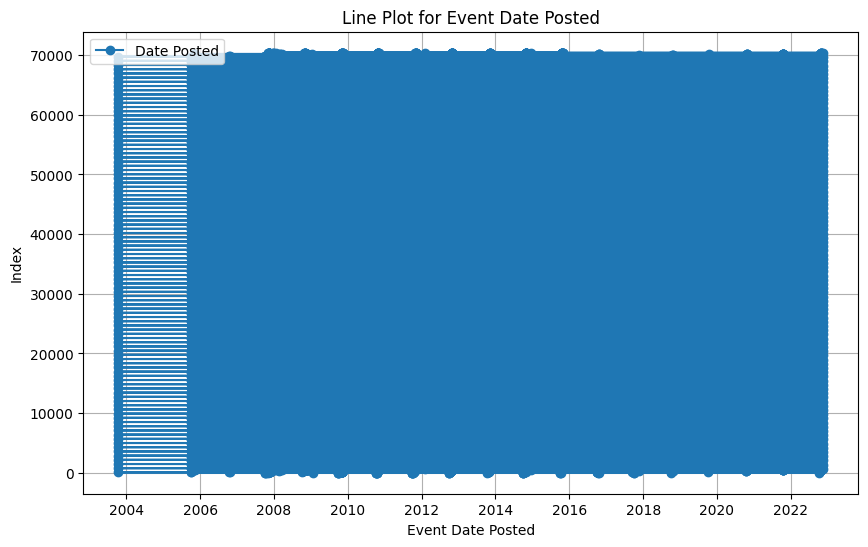

In [13]:
# Creating a figure for the plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Plotting the data: df_openFDA["event_date_posted"] on the x-axis, range(len(df_openFDA)) on the y-axis
# Using markers ('o') to mark data points, and connect them with lines ('-')
# Labeling this data as "Date Posted" for the legend
plt.plot(df_openFDA["event_date_posted"], range(len(df_openFDA)), marker='o', linestyle='-', label="Date Posted")

# Setting the label for the x-axis
plt.xlabel("Event Date Posted")

# Setting the label for the y-axis
plt.ylabel("Index")

# Setting the title of the plot
plt.title("Line Plot for Event Date Posted")

# Adding a grid to the plot for better visualization
plt.grid(True)

# Adding a legend to the plot based on the labels provided earlier
plt.legend()

# Displaying the plot
plt.show()


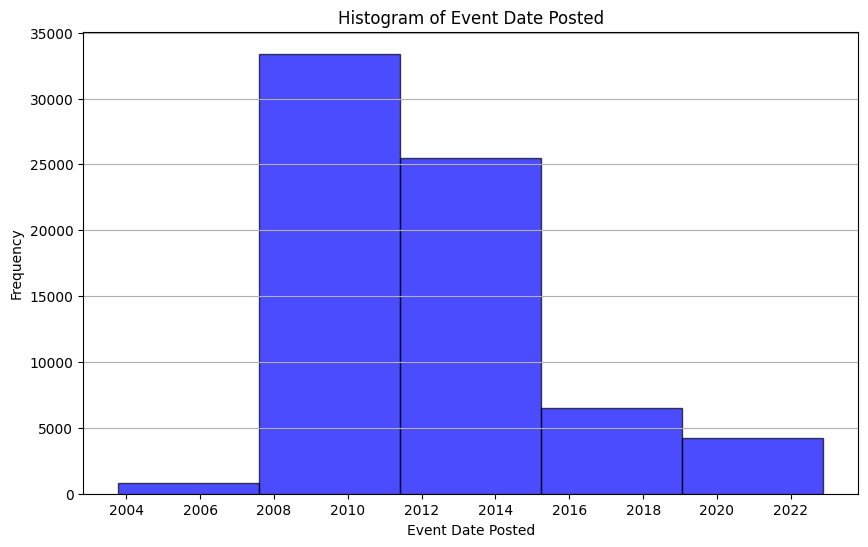

In [14]:
# Creating a figure for the histogram plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Plotting a histogram of the data in df_openFDA["event_date_posted"]
# Dividing the data into 5 bins
# Setting the color of the bars to blue with some transparency (alpha=0.7)
# Adding black edges to the bars for better visibility
plt.hist(df_openFDA["event_date_posted"], bins=5, color='blue', alpha=0.7, edgecolor='black')

# Setting the label for the x-axis
plt.xlabel("Event Date Posted")

# Setting the label for the y-axis
plt.ylabel("Frequency")

# Setting the title of the plot
plt.title("Histogram of Event Date Posted")

# Adding a grid to the y-axis for better visualization
plt.grid(axis='y')

# Displaying the histogram plot
plt.show()


In [15]:
# Checking null values in df_openFDA  dataframe
df_openFDA.isnull().sum()

event_date_posted            0
event_date_terminated     4600
recall_status                0
recalling_firm             800
city                      2400
state                     2700
postal_code               2700
reason_for_recall            0
root_cause_description       0
product_description          0
product_quantity          2800
distribution_pattern         0
action                       0
openfda.device_class         0
dtype: int64

1.1.2 Data Cleaning for column - event_date_terminated


In [16]:
# Checking column datatype
df_openFDA['event_date_terminated'].dtype

dtype('O')

In [17]:
# Converting "event_date_terminated" to datetime data type
df_openFDA['event_date_terminated'] = pd.to_datetime(df_openFDA['event_date_terminated'])

# Checking column datatype
df_openFDA['event_date_terminated'].dtype

dtype('<M8[ns]')

In [18]:
# Checking for null values in column 'event_date_terminated'
df_openFDA['event_date_terminated'].isnull().sum()

4600

In [19]:
# Dropping null value rows from dataframe
df_openFDA.dropna(subset=['event_date_terminated'], inplace=True)

# Checking dimensions of the dataframe
df_openFDA.shape

(65800, 14)

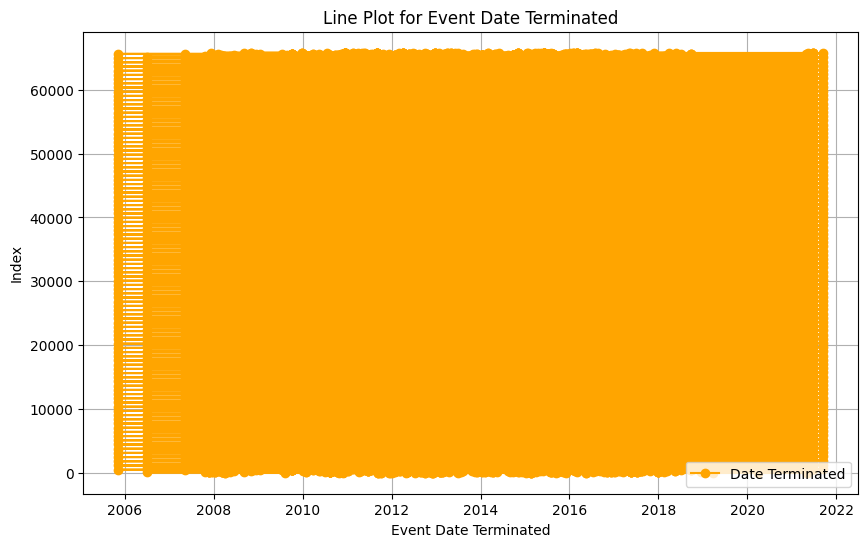

In [20]:
# Creating a figure for the plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Plotting the data: df_openFDA["event_date_terminated"] on the x-axis, range(len(df_openFDA)) on the y-axis
# Using markers ('o') to mark data points, and connect them with lines ('-')
# Setting the color of the line to orange
# Labeling this data as "Date Terminated" for the legend
plt.plot(df_openFDA["event_date_terminated"], range(len(df_openFDA)), marker='o', linestyle='-', color='orange', label="Date Terminated")

# Setting the label for the x-axis
plt.xlabel("Event Date Terminated")

# Setting the label for the y-axis
plt.ylabel("Index")

# Setting the title of the plot
plt.title("Line Plot for Event Date Terminated")

# Adding a grid to the plot for better visualization
plt.grid(True)

# Addig a legend to the plot based on the label provided earlier
plt.legend()

# Displaying the plot
plt.show()


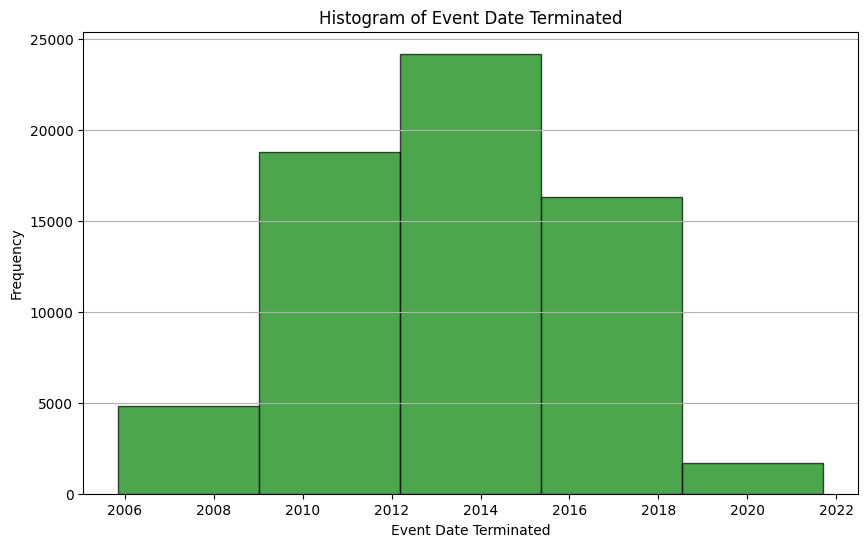

In [21]:
# Creating a figure for the histogram plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Plotting a histogram of the data in df_openFDA["event_date_terminated"]
# Dividing the data into 5 bins
# Setting the color of the bars to green with some transparency (alpha=0.7)
# Adding black edges to the bars for better visibility
plt.hist(df_openFDA["event_date_terminated"], bins=5, color='green', alpha=0.7, edgecolor='black')

# Seting the label for the x-axis
plt.xlabel("Event Date Terminated")

# Setting the label for the y-axis
plt.ylabel("Frequency")

# Setting the title of the plot
plt.title("Histogram of Event Date Terminated")

# Adding a grid to the y-axis for better visualization
plt.grid(axis='y')

# Displaying the histogram plot
plt.show()


In [22]:
# Checking for null values again
df_openFDA.isnull().sum()

event_date_posted            0
event_date_terminated        0
recall_status                0
recalling_firm             400
city                      2300
state                     2600
postal_code               2600
reason_for_recall            0
root_cause_description       0
product_description          0
product_quantity          2600
distribution_pattern         0
action                       0
openfda.device_class         0
dtype: int64

In [23]:
# Time Duration Calculation
df_openFDA["time_duration"] = df_openFDA["event_date_terminated"] - df_openFDA["event_date_posted"]

# Extract Month and Year
df_openFDA["event_month_posted"] = (df_openFDA["event_date_posted"].dt.month).astype('object')
df_openFDA["event_year_posted"] = (df_openFDA["event_date_posted"].dt.year).astype('object')

# Extract Day of the Week (0 = Monday, 6 = Sunday)
df_openFDA["day_of_week_posted"] = (df_openFDA["event_date_posted"].dt.dayofweek).astype('object')

# Extract Month and Year
df_openFDA["event_month_terminated"] = (df_openFDA["event_date_terminated"].dt.month).astype('object')
df_openFDA["event_year_terminated"] = (df_openFDA["event_date_terminated"].dt.year).astype('object')

# Extract Day of the Week (0 = Monday, 6 = Sunday)
df_openFDA["day_of_week_terminated"] = (df_openFDA["event_date_terminated"].dt.dayofweek).astype('object')

# Print the updated DataFrame
df_openFDA.head()


event_date_posted event_date_terminated recall_status  \
0        2007-11-03            2009-08-12    Terminated   
1        2009-01-26            2010-10-29    Terminated   
2        2009-10-05            2010-11-24    Terminated   
3        2010-10-12            2012-11-26    Terminated   
4        2011-10-03            2011-10-03    Terminated   

                                      recalling_firm        city state  \
0                             Bio-Logic Systems Corp   Mundelein    IL   
1  Philips Medical Systems North America Co. Phil...     Bothell    WA   
2                                      Penumbra Inc.     Alameda    CA   
3                        Baxter Healthcare Corp. Rt.  Round Lake    IL   
4                          Medtronic Navigation, Inc  Louisville    CO   

  postal_code                                  reason_for_recall  \
0  60060-3708  Bio-logic System Corp Camera Pole may weaken a...   
1  98021-8431  An issue associated with the "Timed Scan" appl...   
2  94502-6541  Failure-- product can kink or ovalize, which m...   
3       60073  The FDA sent a letter to Baxter on April 30, 2...   
4  80027-9710  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

      product_quantity                               distribution_pattern  \
0            311 units  Worldwide Distribution -- USA and China, Egypt...   
1  19 units in the US.  Nationwide Distribution --- USA including stat...   
2           2246 units  Worldwide Distribution -- USA, Canada, Hong Ko...   
3        221,097 pumps                  Nationwide, including Puerto Rico   
4             6 probes  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

  time_duration event_month_posted event_year_posted day_of_week_posted  \
0      648 days                 11              2007                  5   
1      641 days                  1              2009                  0   
2      415 days                 10              2009                  0   
3      776 days                 10              2010                  1   
4        0 days                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  
0                      8                  2009                      2  
1                     10                  2010                      4  
2                     11                  2010                      2  
3                     11                  2012                      0  
4                     10                  2011                      0

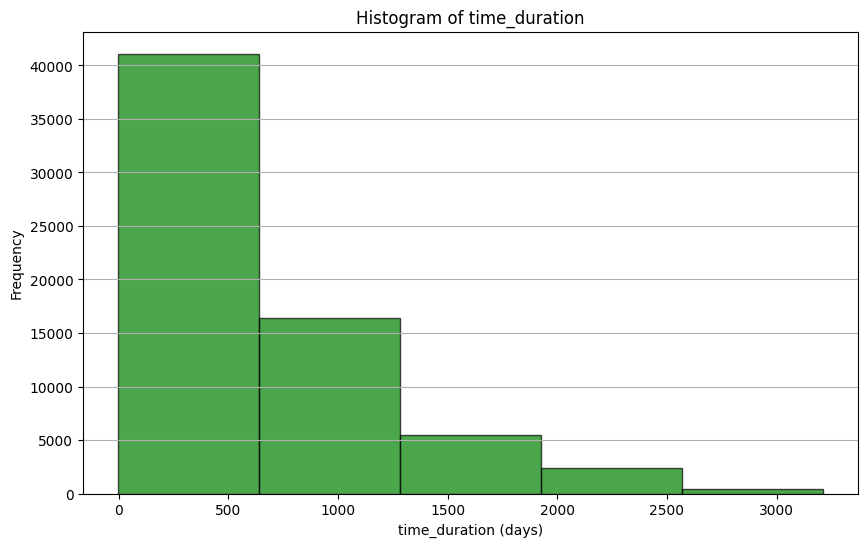

In [24]:
# Convert time duration values to seconds (assuming "time_duration" is a timedelta column)
df_openFDA["time_duration"] = df_openFDA["time_duration"].dt.days

# Creating a figure for the histogram plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Plotting a histogram of the data in df_openFDA["time_duration"]
# Dividing the data into 5 bins
# Setting the color of the bars to green with some transparency (alpha=0.7)
# Adding black edges to the bars for better visibility
plt.hist(df_openFDA["time_duration"], bins=5, color='green', alpha=0.7, edgecolor='black')

# Setting the label for the x-axis
plt.xlabel("time_duration (days)")

# Setting the label for the y-axis
plt.ylabel("Frequency")

# Setting the title of the plot
plt.title("Histogram of time_duration")

# Adding a grid to the y-axis for better visualization
plt.grid(axis='y')

# Displaying the histogram plot
plt.show()


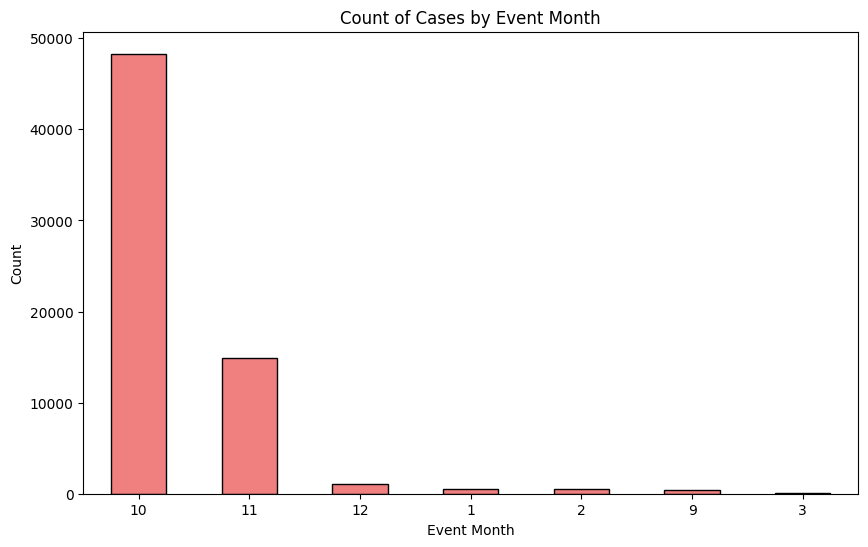

In [25]:
# Create a plot for event month counts
plt.figure(figsize=(10, 6))
df_openFDA["event_month_posted"].value_counts(dropna=False).plot(kind='bar', color="lightcoral", edgecolor='black')
plt.xlabel("Event Month")
plt.ylabel("Count")
plt.title("Count of Cases by Event Month")
plt.xticks(rotation=0)
plt.show()

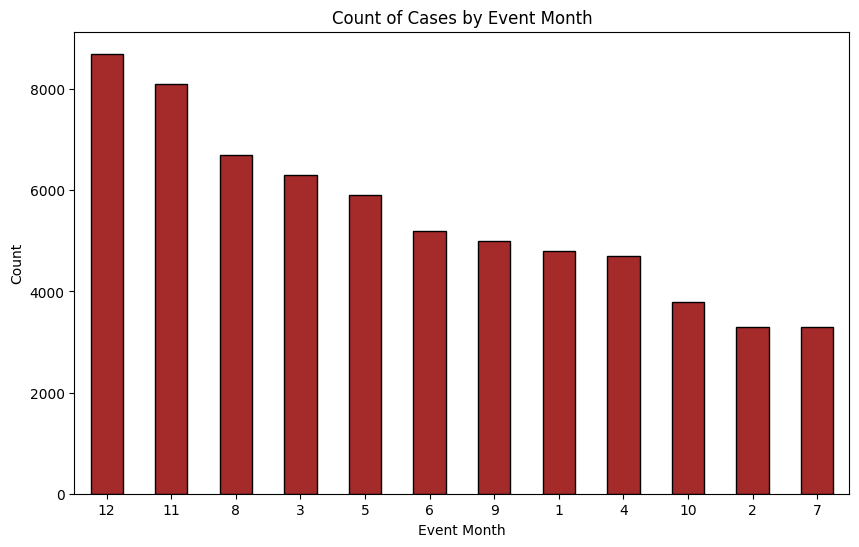

In [26]:
# Create a plot for event month counts
plt.figure(figsize=(10, 6))
df_openFDA["event_month_terminated"].value_counts(dropna=False).plot(kind='bar', color="brown", edgecolor='black')
plt.xlabel("Event Month")
plt.ylabel("Count")
plt.title("Count of Cases by Event Month")
plt.xticks(rotation=0)
plt.show()

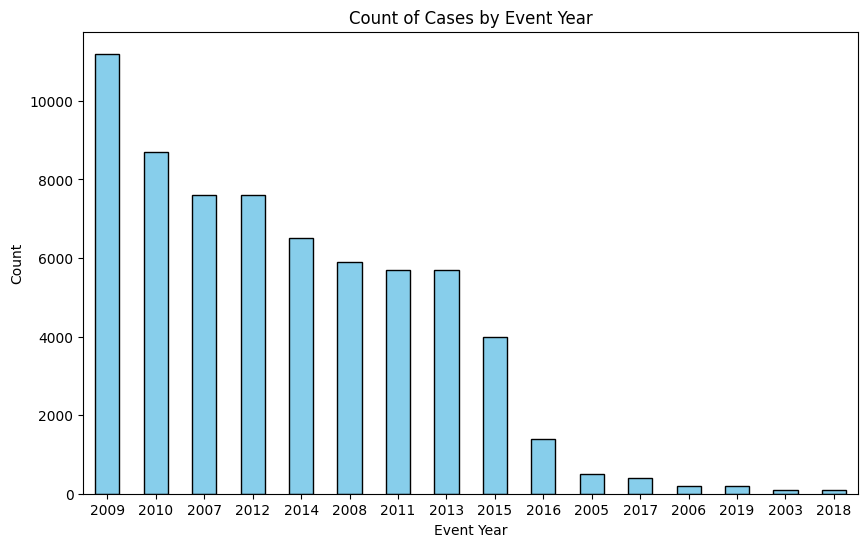

In [27]:
# Create a plot for event month counts
plt.figure(figsize=(10, 6))
df_openFDA["event_year_posted"].value_counts(dropna=False).plot(kind='bar', color="skyblue", edgecolor='black')
plt.xlabel("Event Year")
plt.ylabel("Count")
plt.title("Count of Cases by Event Year")
plt.xticks(rotation=0)
plt.show()

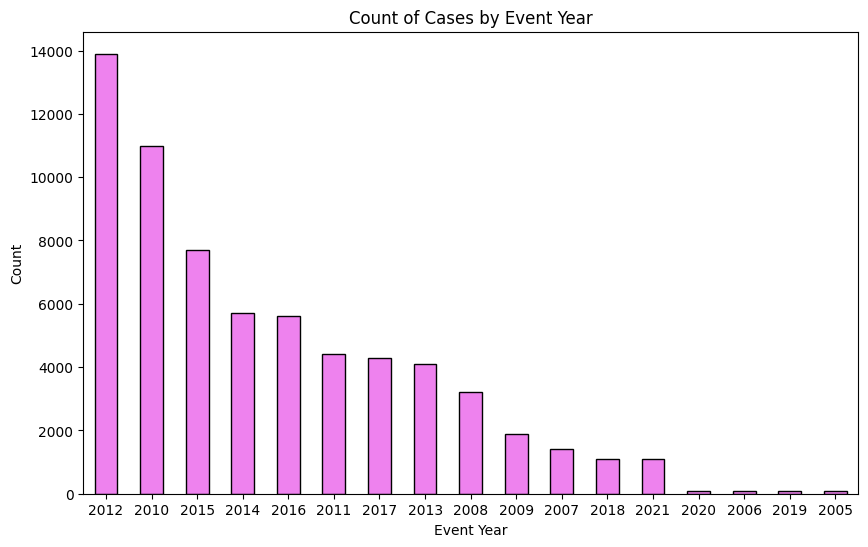

In [28]:
# Create a plot for event month counts
plt.figure(figsize=(10, 6))
df_openFDA["event_year_terminated"].value_counts(dropna=False).plot(kind='bar', color="violet", edgecolor='black')
plt.xlabel("Event Year")
plt.ylabel("Count")
plt.title("Count of Cases by Event Year")
plt.xticks(rotation=0)
plt.show()

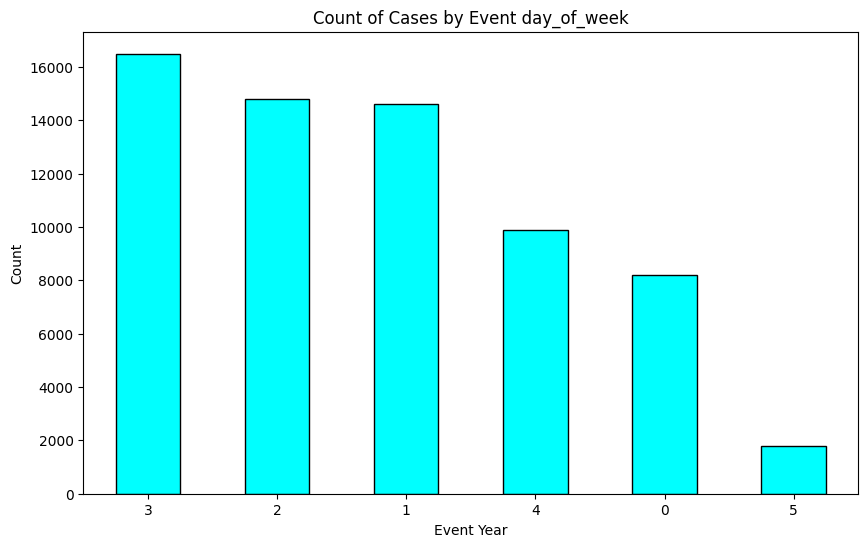

In [29]:
# Create a plot for event month counts
plt.figure(figsize=(10, 6))
df_openFDA["day_of_week_posted"].value_counts(dropna=False).plot(kind='bar', color="cyan", edgecolor='black')
plt.xlabel("Event Year")
plt.ylabel("Count")
plt.title("Count of Cases by Event day_of_week")
plt.xticks(rotation=0)
plt.show()

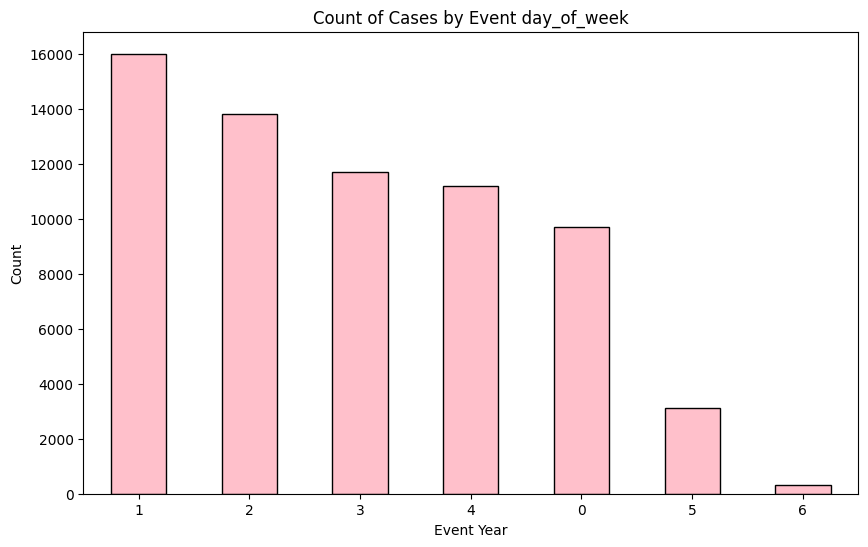

In [30]:
# Create a plot for event month counts
plt.figure(figsize=(10, 6))
df_openFDA["day_of_week_terminated"].value_counts(dropna=False).plot(kind='bar', color="pink", edgecolor='black')
plt.xlabel("Event Year")
plt.ylabel("Count")
plt.title("Count of Cases by Event day_of_week")
plt.xticks(rotation=0)
plt.show()

In [31]:
# Dropping event_date_posted & event_date_terminated

df_openFDA = df_openFDA.drop(['event_date_posted', 'event_date_terminated'], axis=1)

1.1.3 Data Cleaning for column - recall_status


In [32]:
# Checking value count for column recall_status
df_openFDA['recall_status'].value_counts()

recall_status
Terminated    65800
Name: count, dtype: int64

In [33]:
# Column 'recall_status' shows only level as Terminated hence dropping from dataframe

df_openFDA = df_openFDA.drop('recall_status', axis=1)

df_openFDA.head()

recalling_firm        city state  \
0                             Bio-Logic Systems Corp   Mundelein    IL   
1  Philips Medical Systems North America Co. Phil...     Bothell    WA   
2                                      Penumbra Inc.     Alameda    CA   
3                        Baxter Healthcare Corp. Rt.  Round Lake    IL   
4                          Medtronic Navigation, Inc  Louisville    CO   

  postal_code                                  reason_for_recall  \
0  60060-3708  Bio-logic System Corp Camera Pole may weaken a...   
1  98021-8431  An issue associated with the "Timed Scan" appl...   
2  94502-6541  Failure-- product can kink or ovalize, which m...   
3       60073  The FDA sent a letter to Baxter on April 30, 2...   
4  80027-9710  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

      product_quantity                               distribution_pattern  \
0            311 units  Worldwide Distribution -- USA and China, Egypt...   
1  19 units in the US.  Nationwide Distribution --- USA including stat...   
2           2246 units  Worldwide Distribution -- USA, Canada, Hong Ko...   
3        221,097 pumps                  Nationwide, including Puerto Rico   
4             6 probes  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  
0                      8                  2009                      2  
1                     10                  2010                      4  
2                     11                  2010                      2  
3                     11                  2012                      0  
4                     10                  2011                      0

1.1.4 Data Cleaning for column - recalling_firm


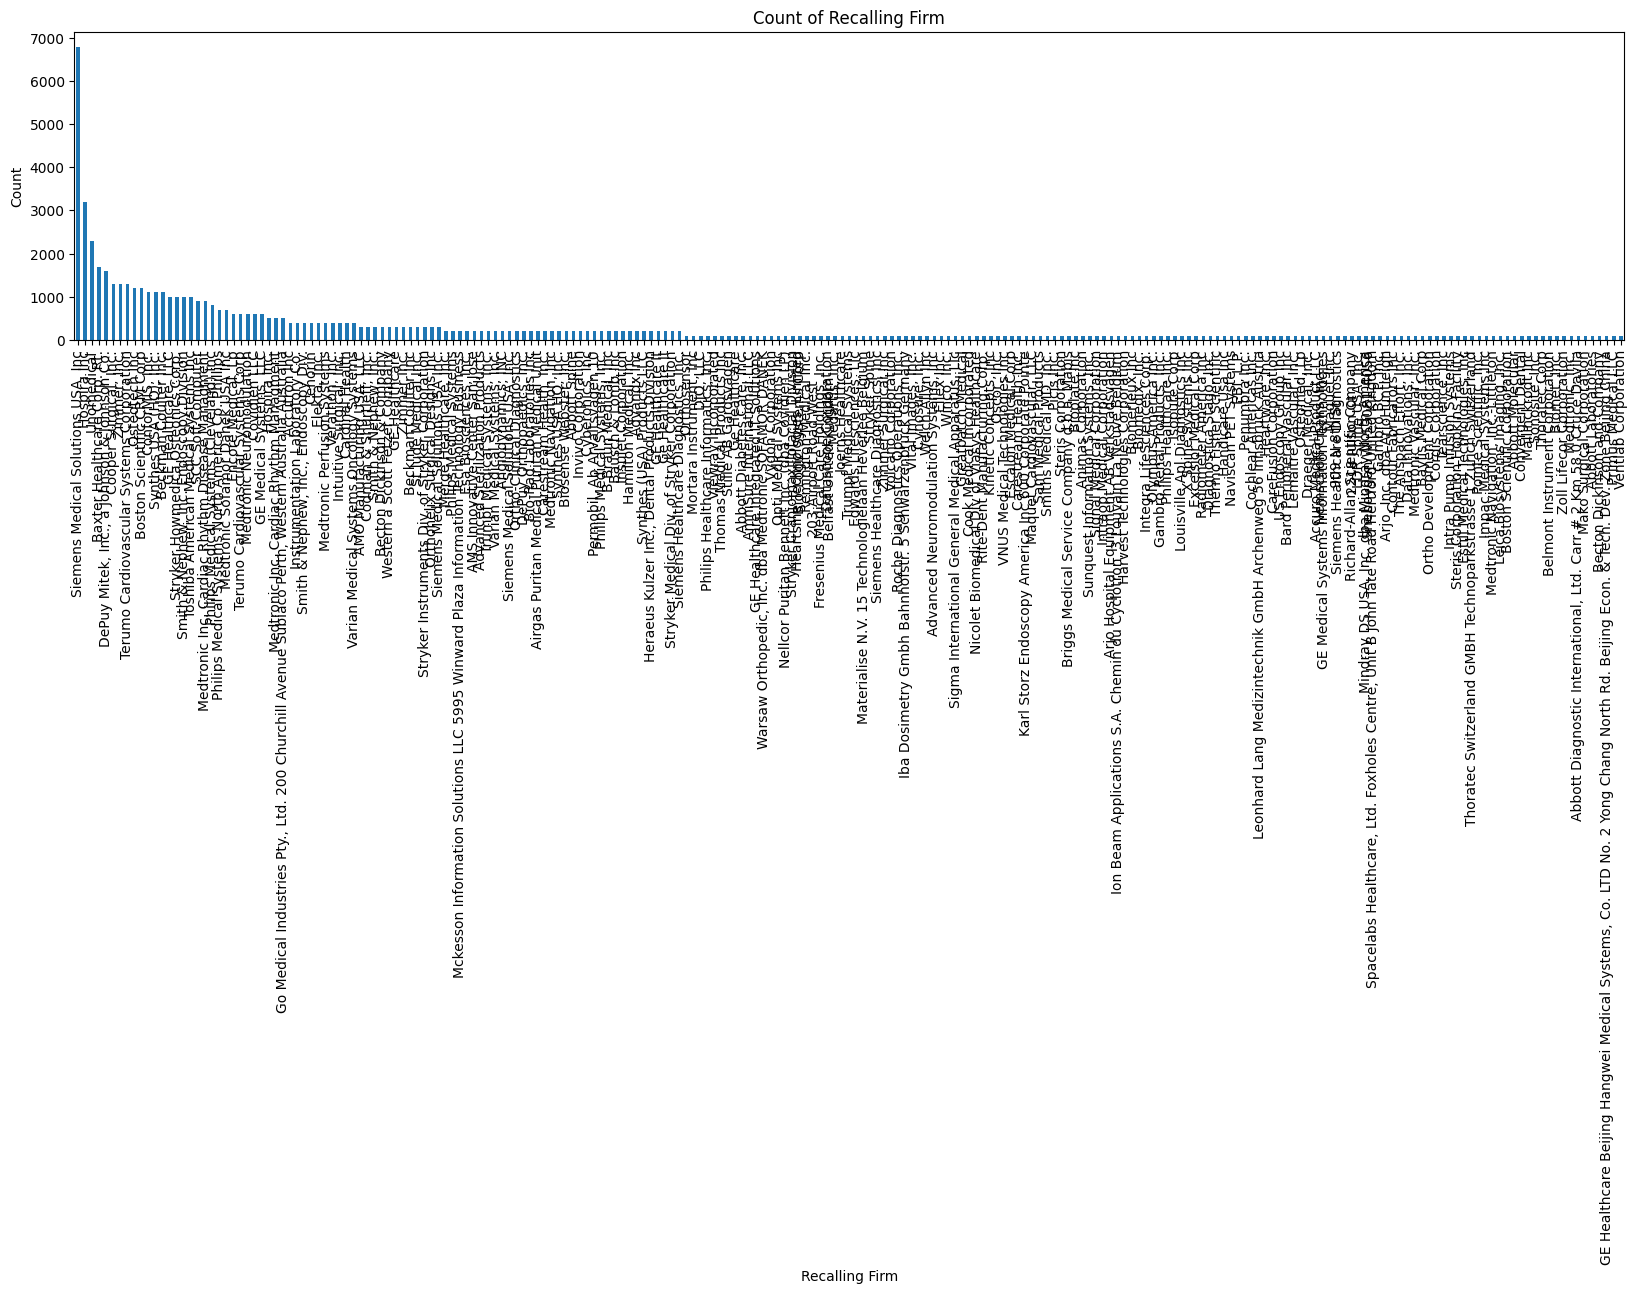

In [34]:
# Creating a figure for the bar plot with a specific size (20 inches wide, 4 inches tall)
plt.figure(figsize=(20, 4))

# Getting the value counts of unique values in the "recalling_firm" column and plot them as a bar chart
df_openFDA['recalling_firm'].value_counts().plot(kind='bar')

# Setting the label for the x-axis
plt.xlabel("Recalling Firm")

# Setting the label for the y-axis
plt.ylabel("Count")

# Title of the plot
plt.title("Count of Recalling Firm")

# Displaying the bar chart
plt.show()


In [35]:
# Calculate value counts of the 'firm' column
firm_counts = df_openFDA['recalling_firm'].value_counts()

firm_counts

recalling_firm
Siemens Medical Solutions USA, Inc                                                                                                 6800
Hospira Inc                                                                                                                        3200
Unomedical                                                                                                                         2300
Baxter Healthcare Corp. Rt.                                                                                                        1700
DePuy Mitek, Inc., a Johnson & Johnson Co.                                                                                         1600
Cooper Surgical, Inc.                                                                                                              1300
Zimmer, Inc.                                                                                                                       1300
Terumo Cardiovascular Systems Cor

In [36]:
# Column 'recalling_firm' doesn't give useful information due to many levels
 
df_openFDA = df_openFDA.drop('recalling_firm', axis=1)

# Checking dataframe
df_openFDA.head()

city state postal_code  \
0   Mundelein    IL  60060-3708   
1     Bothell    WA  98021-8431   
2     Alameda    CA  94502-6541   
3  Round Lake    IL       60073   
4  Louisville    CO  80027-9710   

                                   reason_for_recall root_cause_description  \
0  Bio-logic System Corp Camera Pole may weaken a...          Device Design   
1  An issue associated with the "Timed Scan" appl...        Software design   
2  Failure-- product can kink or ovalize, which m...          Device Design   
3  The FDA sent a letter to Baxter on April 30, 2...          Device Design   
4  Distal end of tactile probe may break off duri...        Labeling design   

                                 product_description     product_quantity  \
0  Bio-logic System Corp --Telescoping Camera Pol...            311 units   
1  NeuViz Dual Multi-Slice Computed Tomography (C...  19 units in the US.   
2  Penumbra Neuron Delivery Catheter 070,  percut...           2246 units   
3  Baxter Colleague Single Channel Volumetric Inf...        221,097 pumps   
4  Probe, Tactile, Left, ASM, Long, \nPart #96200...             6 probes   

                                distribution_pattern  \
0  Worldwide Distribution -- USA and China, Egypt...   
1  Nationwide Distribution --- USA including stat...   
2  Worldwide Distribution -- USA, Canada, Hong Ko...   
3                  Nationwide, including Puerto Rico   
4  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  
0                      8                  2009                      2  
1                     10                  2010                      4  
2                     11                  2010                      2  
3                     11                  2012                      0  
4                     10                  2011                      0

1.1.5 Data Cleaning for column - city


In [37]:
# Checking value count for column city
df_openFDA['city'].value_counts()

city
Malvern                  4200
Concord                  2700
Morgan Hill              2600
Mcallen                  2300
Saint Paul               2300
Warsaw                   2000
Raynham                  1900
Waukesha                 1800
Round Lake               1700
Bedford                  1700
West Chester             1600
Andover                  1500
Brea                     1400
Trumbull                 1300
Ann Arbor                1300
Minneapolis              1300
Bothell                  1200
Eatontown                1200
Mahwah                   1100
Tustin                   1000
Mansfield                1000
Clearwater                900
Austin                    900
Cleveland                 800
Memphis                   700
Rochester                 700
Barrington                600
Ashland                   600
Palo Alto                 600
Sunnyvale                 600
Lake Forest               500
Kent                      400
Portage                   400
Phoen

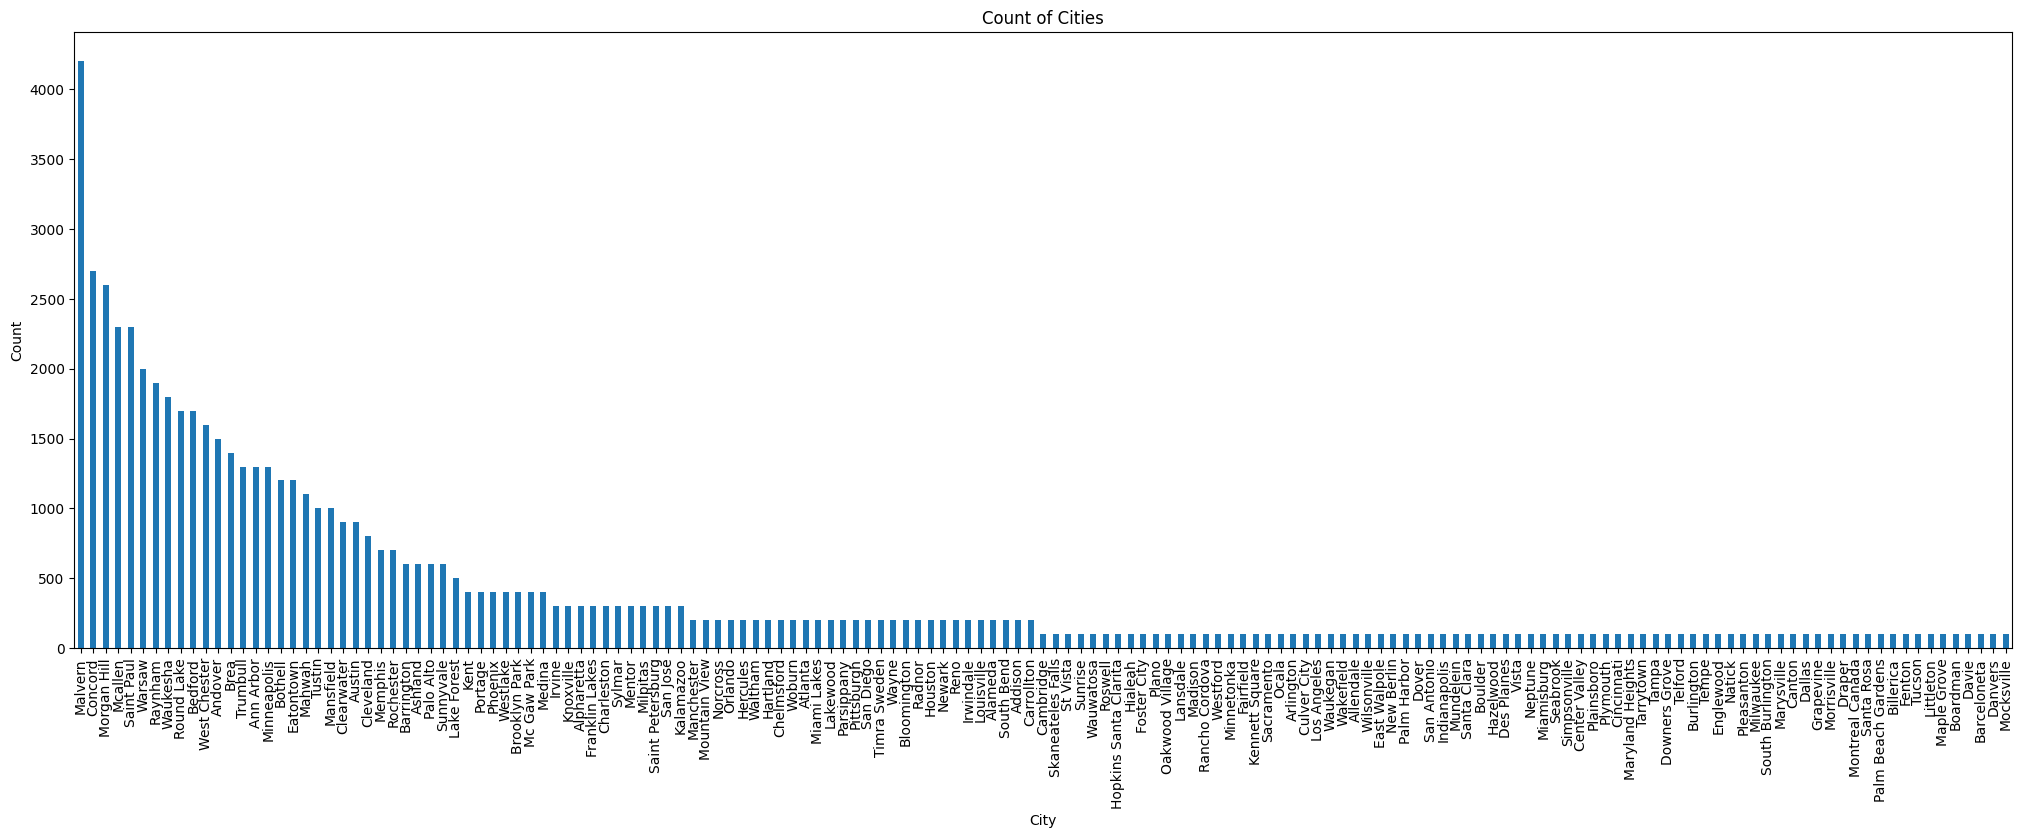

In [38]:
# Creating a figure for the bar plot with a specific size (25 inches wide, 8 inches tall)
plt.figure(figsize=(25, 8))

# Getting the value counts of unique values in the "city" column and plot them as a bar chart
df_openFDA['city'].value_counts().plot(kind='bar')

# Setting the label for the x-axis
plt.xlabel("City")

# Setting the label for the y-axis
plt.ylabel("Count")

# Title of the plot
plt.title("Count of Cities")

# Displaying the bar chart
plt.show()

In [39]:
# Column 'city' doesn't give useful information due to many levels
df_openFDA = df_openFDA.drop('city', axis=1)

# Checking dataframe
df_openFDA.head()

state postal_code                                  reason_for_recall  \
0    IL  60060-3708  Bio-logic System Corp Camera Pole may weaken a...   
1    WA  98021-8431  An issue associated with the "Timed Scan" appl...   
2    CA  94502-6541  Failure-- product can kink or ovalize, which m...   
3    IL       60073  The FDA sent a letter to Baxter on April 30, 2...   
4    CO  80027-9710  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

      product_quantity                               distribution_pattern  \
0            311 units  Worldwide Distribution -- USA and China, Egypt...   
1  19 units in the US.  Nationwide Distribution --- USA including stat...   
2           2246 units  Worldwide Distribution -- USA, Canada, Hong Ko...   
3        221,097 pumps                  Nationwide, including Puerto Rico   
4             6 probes  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  
0                      8                  2009                      2  
1                     10                  2010                      4  
2                     11                  2010                      2  
3                     11                  2012                      0  
4                     10                  2011                      0

In [40]:
# Checking for missing values
df_openFDA.isnull().sum()

state                     2600
postal_code               2600
reason_for_recall            0
root_cause_description       0
product_description          0
product_quantity          2600
distribution_pattern         0
action                       0
openfda.device_class         0
time_duration                0
event_month_posted           0
event_year_posted            0
day_of_week_posted           0
event_month_terminated       0
event_year_terminated        0
day_of_week_terminated       0
dtype: int64

1.1.6 Data Cleaning for column - state


In [41]:
# checking values of levels of state column
df_openFDA['state'].value_counts(dropna=False)

state
CA     12200
MA      8300
PA      6600
TX      4300
MN      4200
IL      3700
NJ      3400
NaN     2600
IN      2500
WI      2400
FL      2300
OH      2300
MI      2300
WA      1600
CT      1300
TN      1000
NY      1000
GA      1000
AZ       600
CO       600
SC       300
NC       200
NV       200
DE       200
MO       200
PR       100
VT       100
UT       100
OR       100
KY       100
Name: count, dtype: int64

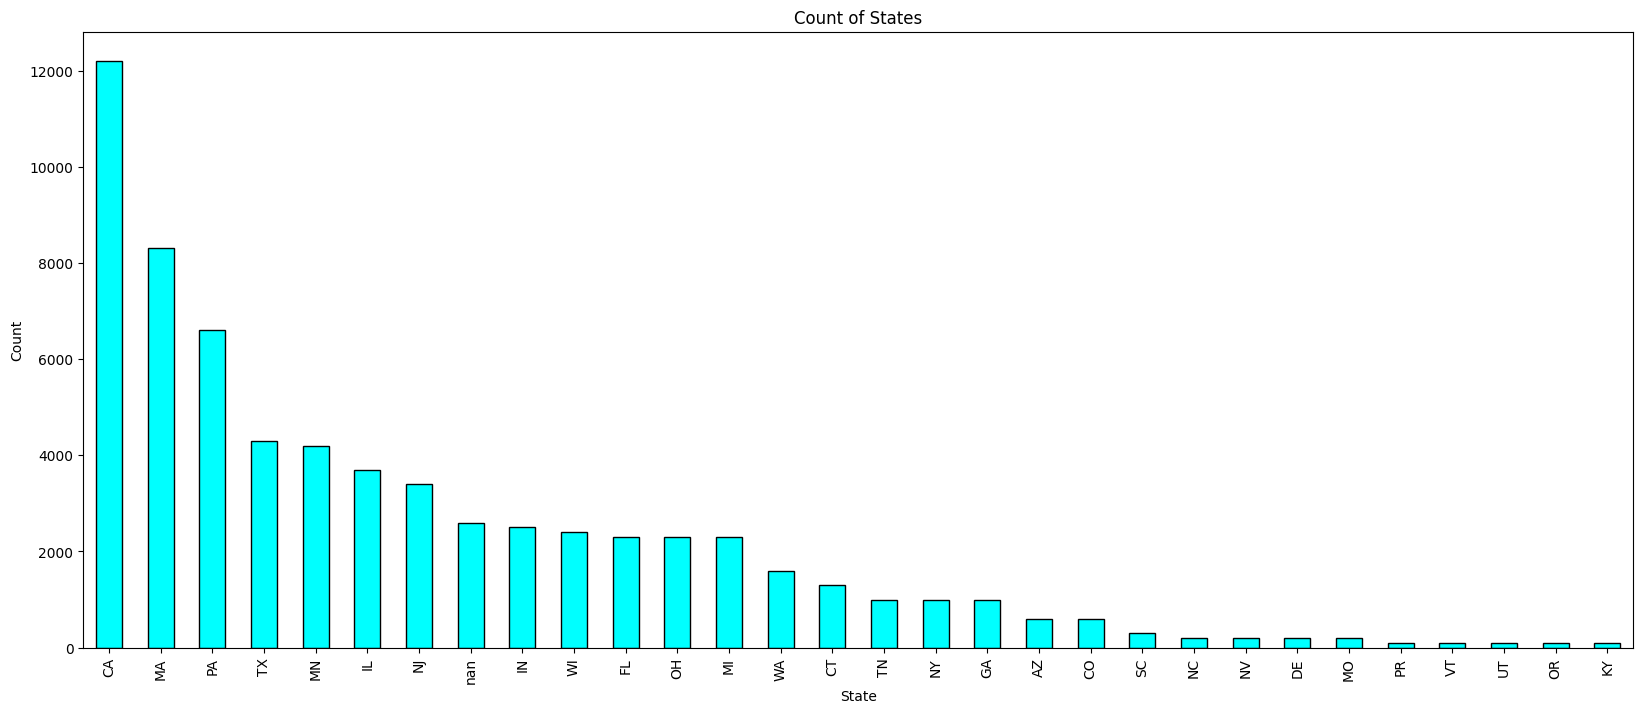

In [42]:
# Creating a figure for the bar plot with a specific size (20 inches wide, 8 inches tall)
plt.figure(figsize=(20, 8))

# Getting the value counts of unique values in the "state" column and plot them as a bar chart
# Including NaN values in the count (dropna=False)
# Using the 'cool' colormap for the bars and add black edges to the bars for better visibility
df_openFDA['state'].value_counts(dropna=False).plot(kind='bar', colormap='cool', edgecolor='black')

# Setting the label for the x-axis
plt.xlabel("State")

# Setting the label for the y-axis
plt.ylabel("Count")

# Title of the plot
plt.title("Count of States")

# Displaying the bar chart
plt.show()

In [43]:
# Replaceing missing values with mode imputation
df_openFDA['state'] = df_openFDA['state'].replace(np.nan, df_openFDA['state'].mode)

# Checking dataframe
df_openFDA.head()

state postal_code                                  reason_for_recall  \
0    IL  60060-3708  Bio-logic System Corp Camera Pole may weaken a...   
1    WA  98021-8431  An issue associated with the "Timed Scan" appl...   
2    CA  94502-6541  Failure-- product can kink or ovalize, which m...   
3    IL       60073  The FDA sent a letter to Baxter on April 30, 2...   
4    CO  80027-9710  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

      product_quantity                               distribution_pattern  \
0            311 units  Worldwide Distribution -- USA and China, Egypt...   
1  19 units in the US.  Nationwide Distribution --- USA including stat...   
2           2246 units  Worldwide Distribution -- USA, Canada, Hong Ko...   
3        221,097 pumps                  Nationwide, including Puerto Rico   
4             6 probes  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  
0                      8                  2009                      2  
1                     10                  2010                      4  
2                     11                  2010                      2  
3                     11                  2012                      0  
4                     10                  2011                      0

In [44]:
# Checking missing value
df_openFDA.isnull().sum()

state                        0
postal_code               2600
reason_for_recall            0
root_cause_description       0
product_description          0
product_quantity          2600
distribution_pattern         0
action                       0
openfda.device_class         0
time_duration                0
event_month_posted           0
event_year_posted            0
day_of_week_posted           0
event_month_terminated       0
event_year_terminated        0
day_of_week_terminated       0
dtype: int64

1.1.7 Data Cleaning for column - postal_code


In [45]:
# Checking value counts for postal_code
df_openFDA['postal_code'].value_counts(dropna=False)

postal_code
19355         3400
94520-1200    2700
NaN           2600
95037-2810    2600
78503-7795    2300
53188-1615    1800
60073         1700
46580-2746    1600
02767-5199    1600
06611         1300
48103-9586    1300
19380-3417    1300
07724-2272    1200
55112-5700    1200
01730-1402    1100
01810-1031    1000
07430          900
55112          900
33760          900
92780-7047     900
92822-6232     900
44143-2131     800
55432-3568     800
38132-1719     700
98021-8431     700
02048-1113     600
94304-1028     600
60010-3051     600
01721-1305     600
19355-1418     500
60045-2579     500
98032          400
55428-1088     400
85027-1382     400
01730-2443     400
02048          400
98011-8218     400
78758          400
60085-6726     400
94086-5304     300
14608-1733     300
01810          300
92822-6208     300
37932-2562     300
91342-3577     300
33716-1130     300
44145-1142     300
95035-7403     300
55440-1250     300
07417-1815     300
02767          300
94547-1803     200


In [46]:
# Dropping column 'postal code'
df_openFDA = df_openFDA.drop('postal_code', axis=1)

# Checking dimensions of the dataframe
df_openFDA.shape

(65800, 15)

1.1.8 Data Cleaning for column - root_cause_description


In [47]:
# Checking value counts for column root cause description
df_openFDA['root_cause_description'].value_counts(dropna=False)

root_cause_description
Device Design                              26300
Software design                            18300
Component design/selection                  8900
Process design                              3900
Package design/selection                    3600
Labeling design                             2400
Software design (manufacturing process)      900
Nonconforming Material/Component             500
Software Design Change                       400
Other                                        300
Process control                              100
Under Investigation by firm                  100
Use error                                    100
Name: count, dtype: int64

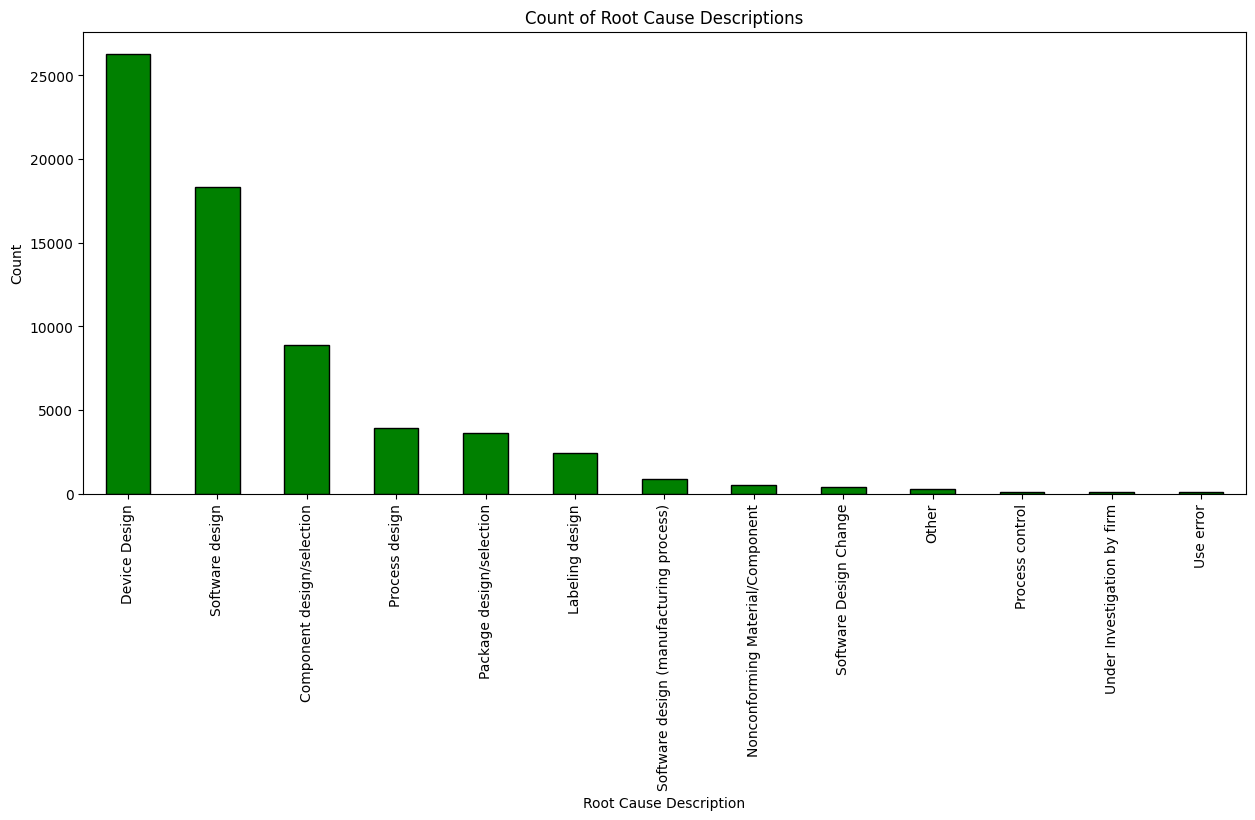

In [48]:
# Creating a figure for the bar plot with a specific size (15 inches wide, 6 inches tall)
plt.figure(figsize=(15, 6))

# Getting the value counts of unique values in the "root_cause_description" column and plot them as a bar chart
# Adding black edges to the bars for better visibility
df_openFDA['root_cause_description'].value_counts().plot(kind='bar', edgecolor='black', color= "green")

# Setting the label for the x-axis
plt.xlabel("Root Cause Description")

# Setting the label for the y-axis
plt.ylabel("Count")

# Title of the plot
plt.title("Count of Root Cause Descriptions")

# Displaying the bar chart
plt.show()

In [49]:
# Checking for missing values
df_openFDA['root_cause_description'].isnull().sum()

0

1.1.9 Data Cleaning for column - product_quantity


In [50]:
# Checking value counts for column product quantity
df_openFDA['product_quantity'].value_counts(dropna=False)

product_quantity
NaN                                                                                                                                            2600
204,999 total                                                                                                                                  2300
over 200 total lots                                                                                                                            2000
1070 systems total in US                                                                                                                        800
1                                                                                                                                               600
20 units                                                                                                                                        600
196 units                                                                                      

In [51]:
# Checking for missing values
df_openFDA['product_quantity'].isnull().sum()

2600

In [52]:
# Define a function to extract numeric values from text
def extract_numeric(text):
    if isinstance(text, str):
        # Use regular expression to find numeric values (including commas and dots)
        numeric_values = re.findall(r'\d[\d,]*(?:\.\d+)?', text)
        
        # Convert the extracted numbers to floats (considering commas)
        numeric_values = [float(value.replace(',', '')) for value in numeric_values]
        
        # Sum all numeric values
        total = sum(numeric_values)
        
        return total
    else:
        return np.nan  # Return NaN for non-string or NaN values

# Apply the extract_numeric function to the 'text_data' column and create a new 'cleaned_numeric' column
df_openFDA['product_quantity_cleaned'] = df_openFDA['product_quantity'].apply(extract_numeric)

# Display the DataFrame with the cleaned values
df_openFDA.head()

state                                  reason_for_recall  \
0    IL  Bio-logic System Corp Camera Pole may weaken a...   
1    WA  An issue associated with the "Timed Scan" appl...   
2    CA  Failure-- product can kink or ovalize, which m...   
3    IL  The FDA sent a letter to Baxter on April 30, 2...   
4    CO  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

      product_quantity                               distribution_pattern  \
0            311 units  Worldwide Distribution -- USA and China, Egypt...   
1  19 units in the US.  Nationwide Distribution --- USA including stat...   
2           2246 units  Worldwide Distribution -- USA, Canada, Hong Ko...   
3        221,097 pumps                  Nationwide, including Puerto Rico   
4             6 probes  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  \
0                      8                  2009                      2   
1                     10                  2010                      4   
2                     11                  2010                      2   
3                     11                  2012                      0   
4                     10                  2011                      0   

   product_quantity_cleaned  
0                     311.0  
1                      19.0  
2                    2246.0  
3                  221097.0  
4                       6.0

In [53]:
# checking for missing values in product_quantity_cleaned
df_openFDA['product_quantity_cleaned'].isnull().sum()

2600

In [54]:
# Dropping missing values as we cannot estimate for accurary of the data
df_openFDA.dropna(subset=['product_quantity_cleaned'], inplace=True)

# Updating data type to int

df_openFDA['product_quantity_cleaned'] = df_openFDA['product_quantity_cleaned'].astype('int')

# Checking dimensions of the dataframe
df_openFDA.shape

(63200, 16)

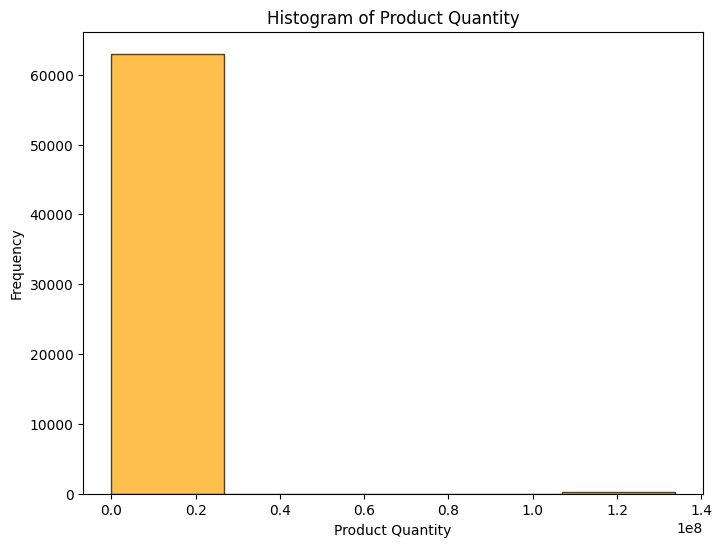

In [55]:
# Create a figure with a single subplot for the histogram
plt.figure(figsize=(8, 6))

# Create a histogram for a float column
plt.hist(df_openFDA["product_quantity_cleaned"], bins=5, color="orange", alpha=0.7, edgecolor="black")
plt.xlabel("Product Quantity")
plt.ylabel("Frequency")
plt.title("Histogram of Product Quantity")

# Display the histogram plot
plt.show()


In [56]:
# Dropping original product quantity column
df_openFDA = df_openFDA.drop('product_quantity', axis=1)

# Checking dataframe
df_openFDA.head()

state                                  reason_for_recall  \
0    IL  Bio-logic System Corp Camera Pole may weaken a...   
1    WA  An issue associated with the "Timed Scan" appl...   
2    CA  Failure-- product can kink or ovalize, which m...   
3    IL  The FDA sent a letter to Baxter on April 30, 2...   
4    CO  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

                                distribution_pattern  \
0  Worldwide Distribution -- USA and China, Egypt...   
1  Nationwide Distribution --- USA including stat...   
2  Worldwide Distribution -- USA, Canada, Hong Ko...   
3                  Nationwide, including Puerto Rico   
4  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  \
0                      8                  2009                      2   
1                     10                  2010                      4   
2                     11                  2010                      2   
3                     11                  2012                      0   
4                     10                  2011                      0   

   product_quantity_cleaned  
0                       311  
1                        19  
2                      2246  
3                    221097  
4                         6

1.1.10 Data Cleaning for column - distribution_pattern


In [57]:
# checking value count for column distribution pattern
df_openFDA['distribution_pattern'].value_counts(dropna=False)

distribution_pattern
Worldwide Distribution                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [58]:
# Creating function to update values to 'nationwide' or 'worldwide'
def update_distribution_pattern(text):
    # Check if the lowercase text contains specific keywords
    if "worldwide" in text.lower() or "globally" in text.lower() or "continental" in text.lower():
        # If any of the worldwide keywords are found, return "Worldwide distribution"
        return "Worldwide distribution"
    elif "nationwide" in text.lower() or "us" in text.lower() or 'usa' in text.lower() or "nationally" in text.lower() or "united states" in text.lower() or "u.s." in text.lower():
        # If any of the nationwide keywords are found, return "Nationwide distribution"
        return "Nationwide distribution"
    else:
        # If none of the keywords match, return the original text
        return text

# Apply the update_distribution_pattern function to the "distribution_pattern" column
df_openFDA["distribution"] = df_openFDA["distribution_pattern"].apply(update_distribution_pattern)

# Print the cleaned DataFrame
df_openFDA.head()


state                                  reason_for_recall  \
0    IL  Bio-logic System Corp Camera Pole may weaken a...   
1    WA  An issue associated with the "Timed Scan" appl...   
2    CA  Failure-- product can kink or ovalize, which m...   
3    IL  The FDA sent a letter to Baxter on April 30, 2...   
4    CO  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

                                distribution_pattern  \
0  Worldwide Distribution -- USA and China, Egypt...   
1  Nationwide Distribution --- USA including stat...   
2  Worldwide Distribution -- USA, Canada, Hong Ko...   
3                  Nationwide, including Puerto Rico   
4  Worldwide Distribution: Nationwide distributio...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  \
0                      8                  2009                      2   
1                     10                  2010                      4   
2                     11                  2010                      2   
3                     11                  2012                      0   
4                     10                  2011                      0   

   product_quantity_cleaned             distribution  
0                       311   Worldwide distribution  
1                        19  Nationwide distribution  
2                      2246   Worldwide distribution  
3                    221097  Nationwide distribution  
4                         6   Worldwide distribution

In [59]:
# Checking value counts for column description
df_openFDA['distribution'].value_counts(dropna=False)

distribution
Worldwide distribution                                                  43300
Nationwide distribution                                                 19100
Products distributed to direct accounts in CA, FL and MD.                 200
Product was shipped to a distributor in Canada.                           100
AZ, CA, FL, MA, MI. No military, government or foreign distribution.      100
MN                                                                        100
Product was distributed to one direct account in MN.                      100
UT, MD, CO                                                                100
Distributed in MI, ID, TX, and in France.                                 100
Name: count, dtype: int64

In [60]:
# "Lets drop these rows as these will create extra variable in analysis" or "we can save all these extra rows under "other" as a level"

# Calculate the counts of each unique value
value_counts = df_openFDA["distribution"].value_counts()

# Create a list of values to drop
values_to_drop = value_counts[value_counts < 1000].index.tolist()

# Filter the DataFrame to drop rows with values in the values_to_drop list
df_openFDA = df_openFDA[~df_openFDA["distribution"].isin(values_to_drop)]

# Checking value counts for column description
df_openFDA['distribution'].value_counts(dropna=False)

distribution
Worldwide distribution     43300
Nationwide distribution    19100
Name: count, dtype: int64

In [61]:
# Dropping column product_description from dataframe
df_openFDA = df_openFDA.drop('distribution_pattern', axis=1)

# Checking dataframe
df_openFDA.head()

state                                  reason_for_recall  \
0    IL  Bio-logic System Corp Camera Pole may weaken a...   
1    WA  An issue associated with the "Timed Scan" appl...   
2    CA  Failure-- product can kink or ovalize, which m...   
3    IL  The FDA sent a letter to Baxter on April 30, 2...   
4    CO  Distal end of tactile probe may break off duri...   

  root_cause_description                                product_description  \
0          Device Design  Bio-logic System Corp --Telescoping Camera Pol...   
1        Software design  NeuViz Dual Multi-Slice Computed Tomography (C...   
2          Device Design  Penumbra Neuron Delivery Catheter 070,  percut...   
3          Device Design  Baxter Colleague Single Channel Volumetric Inf...   
4        Labeling design  Probe, Tactile, Left, ASM, Long, \nPart #96200...   

                                              action openfda.device_class  \
0  Bio-logic sent a Safety Alert letters dated 7/...              Class I   
1  A letter was issued to customers prior to the ...            Class III   
2  The firm issued an Urgent Voluntary Field Remo...              Class I   
3  Baxter Healthcare Corporation sent "Urgent Pro...             Class II   
4  Medtronic sent an "Urgent Product Safety Notic...             Class II   

   time_duration event_month_posted event_year_posted day_of_week_posted  \
0            648                 11              2007                  5   
1            641                  1              2009                  0   
2            415                 10              2009                  0   
3            776                 10              2010                  1   
4              0                 10              2011                  0   

  event_month_terminated event_year_terminated day_of_week_terminated  \
0                      8                  2009                      2   
1                     10                  2010                      4   
2                     11                  2010                      2   
3                     11                  2012                      0   
4                     10                  2011                      0   

   product_quantity_cleaned             distribution  
0                       311   Worldwide distribution  
1                        19  Nationwide distribution  
2                      2246   Worldwide distribution  
3                    221097  Nationwide distribution  
4                         6   Worldwide distribution

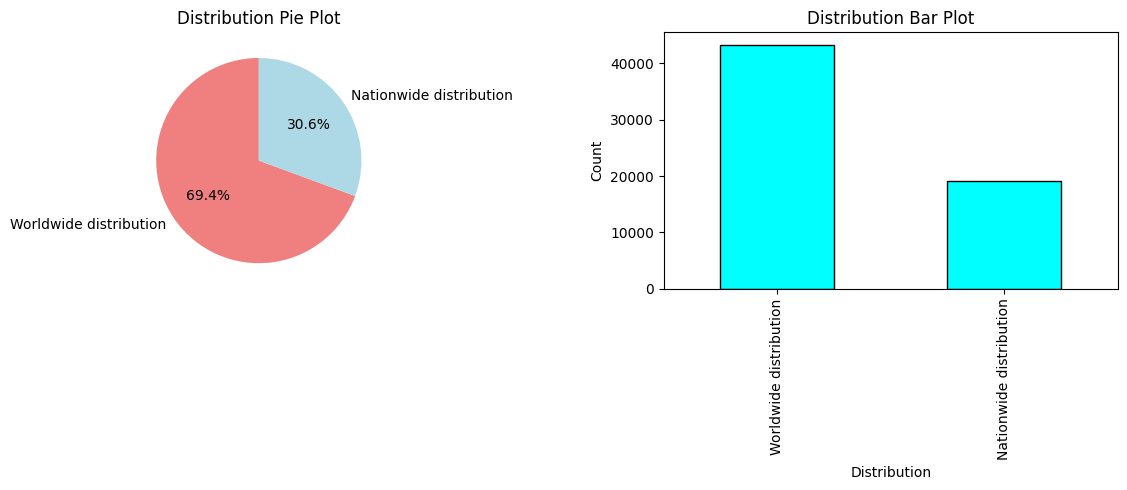

In [62]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Pie Plot
distribution_counts = df_openFDA["distribution"].value_counts(dropna=False)
axes[0].pie(distribution_counts, labels=distribution_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[0].set_title("Distribution Pie Plot")

# Subplot 2: Bar Plot
df_openFDA["distribution"].value_counts(dropna=False).plot(kind='bar', ax=axes[1], color='cyan', edgecolor='black')
axes[1].set_xlabel("Distribution")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution Bar Plot")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


1.1.11 Data Cleaning for column - reason_for_recall

In [63]:
# Checking value count for column reason_for_recall
df_openFDA['reason_for_recall'].value_counts(dropna=False)

reason_for_recall
In some Manual Pulmonary Resuscitator units the duckbill valve and retention ring inside the patient valve housing may become dislodged and fall into the MPR bag/body. If this occurs, the MPR may lose its ability to generate the positive pressure necessary necessary to ventilate the patient.                                                                                                                                                                                                                                                         2300
Fire/Shock hazard-- A component used in the device may cause sparks/flashes and poses a fire and shock hazard.                                                                                                                                                                                                                                                                                                                                      

In [64]:
# Creating Function for text cleanup
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers and special characters
    text = ''.join([char for char in text if not char.isdigit()])
    
    return text

# Apply text cleanup to the "action" column
df_openFDA["cleaned_reason_for_recall"] = df_openFDA["reason_for_recall"].apply(clean_text)

# Combine cleaned text into a single string
all_text_reason_for_recall = ' '.join(df_openFDA["cleaned_reason_for_recall"])

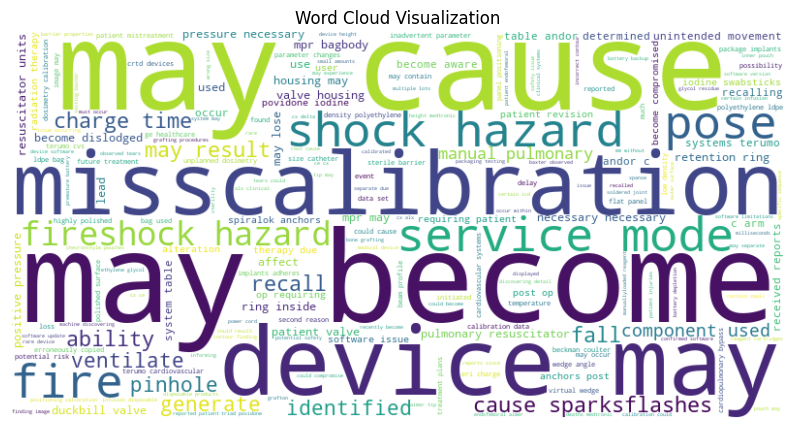

In [65]:
# Create a WordCloud configuration:
# - Set the width and height of the WordCloud image (in pixels)
# - Specify the background color as white
# - Define a set of English stopwords to exclude common words like "the," "and," etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english')))

# Generate the WordCloud based on the provided text data (all_text_reason_for_recall)
wordcloud_image = wordcloud.generate(all_text_reason_for_recall)

# Create a figure for the WordCloud plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Display the WordCloud image with bilinear interpolation
plt.imshow(wordcloud_image, interpolation='bilinear')

# Turn off the axis labels and ticks
plt.axis("off")

# Set the title of the Word Cloud visualization
plt.title("Word Cloud Visualization")

# Show the Word Cloud plot
plt.show()


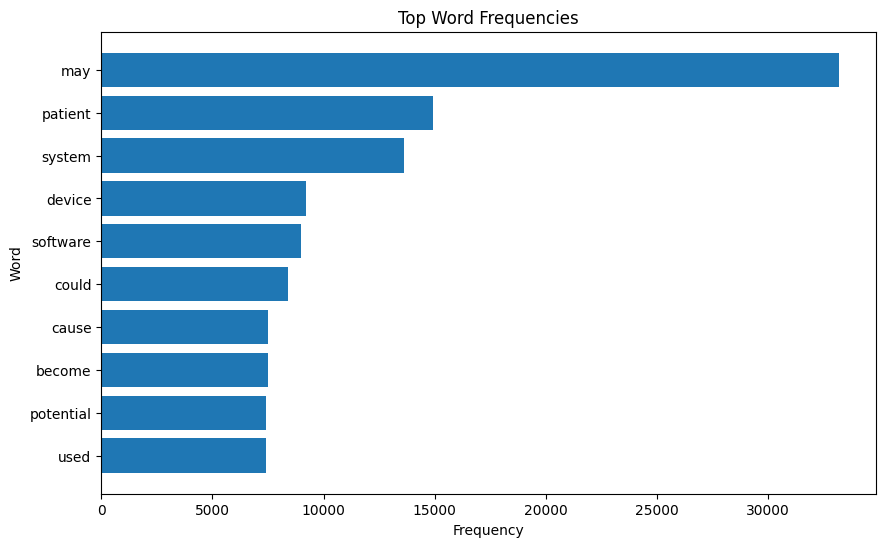

In [66]:
# Tokenize the text (split it into words)
words = word_tokenize(all_text_reason_for_recall)

# Remove stopwords and punctuation:
# - Set the list of stopwords for the English language
# - Filter and convert words to lowercase, excluding non-alphanumeric words and stopwords
stop_words = set(stopwords.words("english"))
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# Calculate word frequencies using FreqDist from NLTK
freq_dist = FreqDist(filtered_words)

# Get the most common words and their frequencies (top 10 words in this case)
most_common_words = freq_dist.most_common(10)  # Change 10 to the desired number of words to display

# Convert the word frequencies to a DataFrame for plotting
word_freq_df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])

# Create a bar chart of word frequencies
plt.figure(figsize=(10, 6))

# Plot horizontal bars using the words as labels and their frequencies on the x-axis
plt.barh(word_freq_df["Word"], word_freq_df["Frequency"])

# Set the label for the x-axis
plt.xlabel("Frequency")

# Set the label for the y-axis
plt.ylabel("Word")

# Set the title of the plot
plt.title("Top Word Frequencies")

# Invert the y-axis to show the most frequent words at the top
plt.gca().invert_yaxis()

# Show the bar chart
plt.show()


In [67]:
# Dropping reason_for_recall

df_openFDA = df_openFDA.drop('reason_for_recall', axis=1)

1.1.12 Data Cleaning for column - Product_description

In [68]:
# Checking value counts for column product_description
df_openFDA['product_description'].value_counts(dropna=False)

product_description
Scorpio/ NRG 4 i n1 Cutting Block\nThe Scorpio total knee system is indicated for primary Total knee Arthoplasty (TKA) procedures. The Scorpio Femoral Component is implanted on femur after making bone cuts to accommodate the shape of the implant. The Scorpio instrumentation includes a 4 in 1 Cutting block 98010-00xx) which serves as a guide to allow the surgeon to make the bone e cuts necessary for seating the femoral component (implant) in place. The Scorpio Cutting blocks (8010-00xx) are designed to align with two previously located holes and for seating on the distal surg ace of the femur, and provide guided slots for the sawblades to make bone cuts.                                                                                                                                                                                                                                                                                                                               

In [69]:
# Creating Function for text cleanup
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers and special characters
    text = ''.join([char for char in text if not char.isdigit()])
    
    return text

# Apply text cleanup to the "action" column
df_openFDA["cleaned_product_description"] = df_openFDA["product_description"].apply(clean_text)

# Combine cleaned text into a single string
all_text_product_description = ' '.join(df_openFDA["cleaned_product_description"])

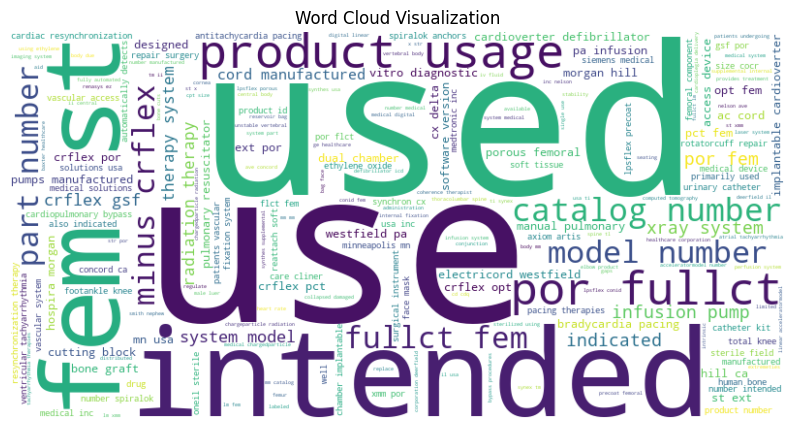

In [70]:
# Creating a WordCloud configuration:
# - Setting the width and height of the WordCloud image (in pixels)
# - Specifying the background color as white
# - Defining a set of English stopwords to exclude common words like "the," "and," etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english')))

# Generating the WordCloud based on the provided text data (all_text_action)
wordcloud_image = wordcloud.generate(all_text_product_description)

# Creating a figure for the WordCloud plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Displaying the WordCloud image with bilinear interpolation
plt.imshow(wordcloud_image, interpolation='bilinear')

# Turning off the axis labels and ticks
plt.axis("off")

# Setting the title of the Word Cloud visualization
plt.title("Word Cloud Visualization")

# Showing the Word Cloud plot
plt.show()

In [71]:
# Dropping reason_for_recall

df_openFDA = df_openFDA.drop('product_description', axis=1)

1.1.13 Data Cleaning for column - action

In [72]:
# Checking value counts for column action
df_openFDA['action'].value_counts(dropna=False)

action
Firm initiated its recall on 08/14/2009.  A nationwide press release was issued to AP, and an Urgent: Device Field Correction letter to consignees was sent via UPS.  The letter recommended that customers check their infusion pumps and spare parts in their inventory to determine if the specified AC Power Cords are in use at their facility; and, to inspect the affected cords for bent or cracked prongs and bridge connection, burnt plastic, or excessive wear and tear.  Also, it was recommended that customers immediately discontinue use of the affected cords exhibiting the described characteristics and contact their local Hospira representative for assistance.  The letter stated that customers may continue to use and monitor cords that are not exhibiting the described characteristics until replacement cords are sent to their facility.  Hospira will contact customers to schedule replacement.  Customers are to complete and return the attached Reply Form.  Question should be directed to

In [73]:
# Creating Function for text cleanup
def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removing numbers and special characters
    text = ''.join([char for char in text if not char.isdigit()])
    
    return text

# Applying text cleanup to the "action" column
df_openFDA["cleaned_action"] = df_openFDA["action"].apply(clean_text)

# Combining cleaned text into a single string
all_text_action = ' '.join(df_openFDA["cleaned_action"])

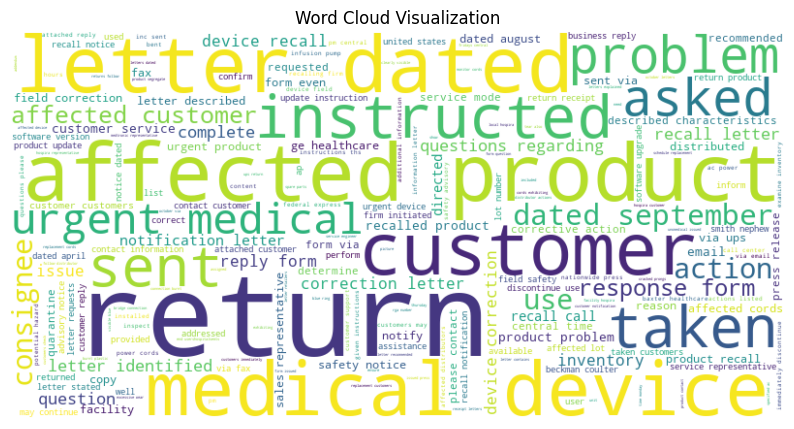

In [74]:
# Creating a WordCloud configuration:
# - Setting the width and height of the WordCloud image (in pixels)
# - Specifing the background color as white
# - Defining a set of English stopwords to exclude common words like "the," "and," etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english')))

# Generating the WordCloud based on the provided text data (all_text_action)
wordcloud_image = wordcloud.generate(all_text_action)

# Creating a figure for the WordCloud plot with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Displaying the WordCloud image with bilinear interpolation
plt.imshow(wordcloud_image, interpolation='bilinear')

# Turning off the axis labels and ticks
plt.axis("off")

# Setting the title of the Word Cloud visualization
plt.title("Word Cloud Visualization")

# Showing the Word Cloud plot
plt.show()

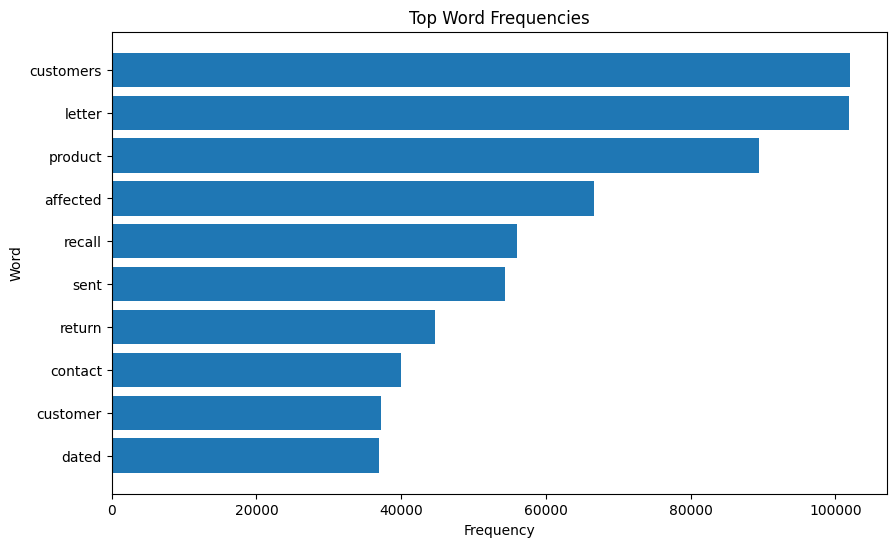

In [75]:
# Tokenizing the text (split it into words)
words = word_tokenize(all_text_action)

# Removeing stopwords and punctuation:

# - Setting the list of stopwords for the English language
stop_words = set(stopwords.words("english"))

# - Filtering and convert words to lowercase, excluding non-alphanumeric words and stopwords
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# Calculating word frequencies using FreqDist from NLTK
freq_dist = FreqDist(filtered_words)

# Getting the most common words and their frequencies (top 10 words in this case)
most_common_words = freq_dist.most_common(10)  # Change 10 to the desired number of words to display

# Converting the word frequencies to a DataFrame for plotting
word_freq_df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])

# Creating a bar chart of word frequencies
plt.figure(figsize=(10, 6))

# Plotting horizontal bars using the words as labels and their frequencies on the x-axis
plt.barh(word_freq_df["Word"], word_freq_df["Frequency"])

# Setting the label for the x-axis
plt.xlabel("Frequency")

# Setting the label for the y-axis
plt.ylabel("Word")

# Setting the title of the plot
plt.title("Top Word Frequencies")

# Inverting the y-axis to show the most frequent words at the top
plt.gca().invert_yaxis()

# Showing the bar chart
plt.show()

In [76]:
# Dropping reason_for_recall

df_openFDA = df_openFDA.drop('action', axis=1)

1.1.14 Data Cleaning for column - openfda.device_class

In [77]:
# Checking value counts for column - openfda.device_class

df_openFDA['openfda.device_class'].value_counts(dropna=False)

openfda.device_class
Class II     35972
Class III    17566
Class I       8862
Name: count, dtype: int64

In [78]:
# Converting dtype for column openfda.device_class to object dtye

df_openFDA['openfda.device_class'] = df_openFDA['openfda.device_class'].astype('object')

df_openFDA['openfda.device_class'].dtype

dtype('O')

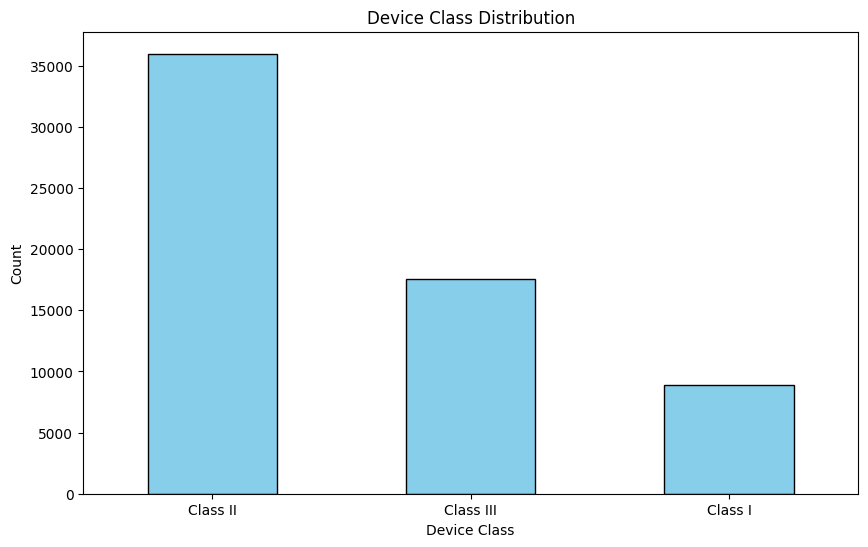

In [79]:
# Create a bar plot of the column with color and x-label rotation
plt.figure(figsize=(10, 6))
ax = df_openFDA['openfda.device_class'].value_counts(dropna=False).plot(kind='bar', edgecolor='black', color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Rotate x-labels to 0 degrees
plt.xlabel("Device Class")
plt.ylabel("Count")
plt.title("Device Class Distribution")
plt.show()


## 1.2 Bi-variate analysis 

In [80]:
df_openFDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 0 to 99998
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   state                        62400 non-null  object
 1   root_cause_description       62400 non-null  object
 2   openfda.device_class         62400 non-null  object
 3   time_duration                62400 non-null  int64 
 4   event_month_posted           62400 non-null  object
 5   event_year_posted            62400 non-null  object
 6   day_of_week_posted           62400 non-null  object
 7   event_month_terminated       62400 non-null  object
 8   event_year_terminated        62400 non-null  object
 9   day_of_week_terminated       62400 non-null  object
 10  product_quantity_cleaned     62400 non-null  int32 
 11  distribution                 62400 non-null  object
 12  cleaned_reason_for_recall    62400 non-null  object
 13  cleaned_product_description  62400 n

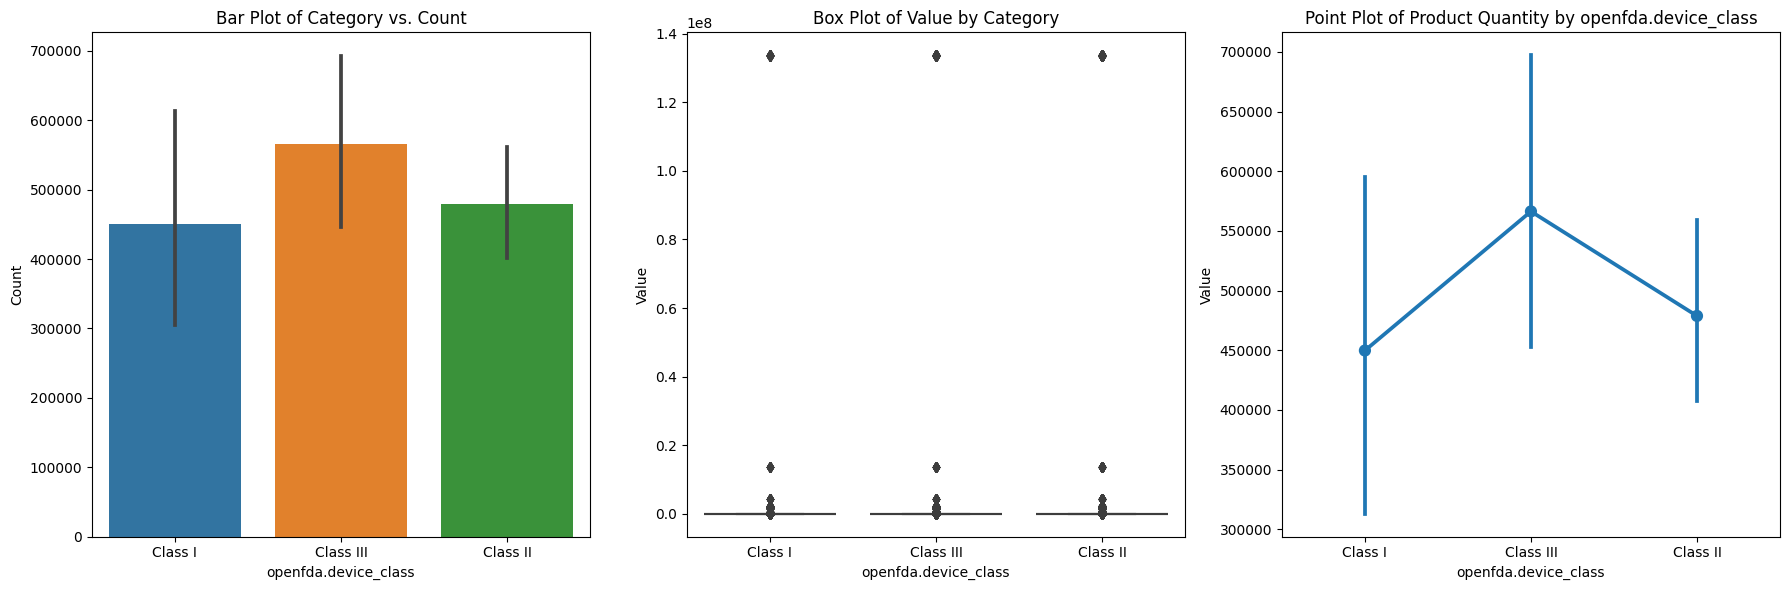

In [81]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Bar Plot
sns.barplot(x='openfda.device_class', y='product_quantity_cleaned', data=df_openFDA, ax=axes[0])
axes[0].set_xlabel('openfda.device_class')
axes[0].set_ylabel('Count')
axes[0].set_title('Bar Plot of Category vs. Count')

# Plot 2: Box Plot
sns.boxplot(x='openfda.device_class', y='product_quantity_cleaned', data=df_openFDA, ax=axes[1])
axes[1].set_xlabel('openfda.device_class')
axes[1].set_ylabel('Value')
axes[1].set_title('Box Plot of Value by Category')

# Plot 3: Point Plot
sns.pointplot(x='openfda.device_class', y='product_quantity_cleaned', data=df_openFDA, ax=axes[2])
axes[2].set_xlabel('openfda.device_class')
axes[2].set_ylabel('Value')
axes[2].set_title('Point Plot of Product Quantity by openfda.device_class')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


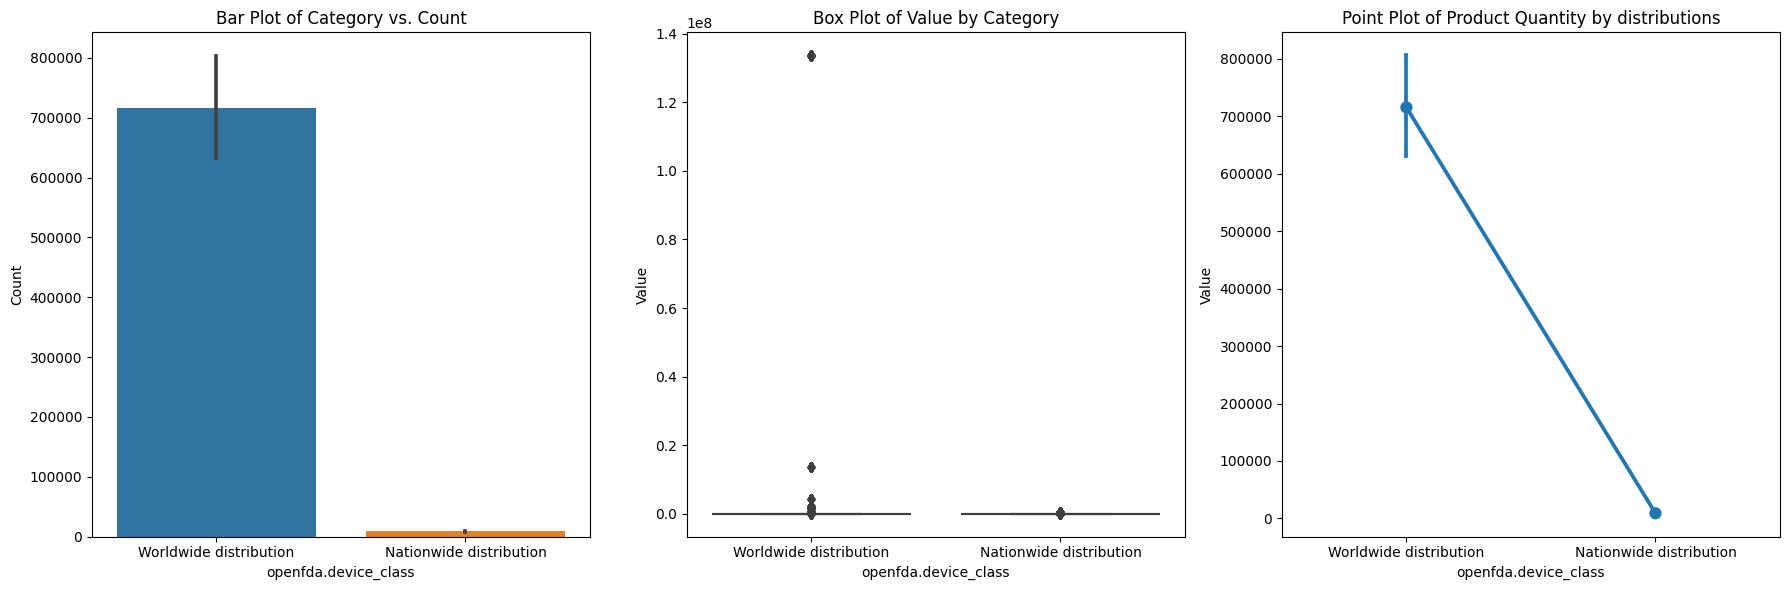

In [82]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Bar Plot
sns.barplot(x='distribution', y='product_quantity_cleaned', data=df_openFDA, ax=axes[0])
axes[0].set_xlabel('openfda.device_class')
axes[0].set_ylabel('Count')
axes[0].set_title('Bar Plot of Category vs. Count')

# Plot 2: Box Plot
sns.boxplot(x='distribution', y='product_quantity_cleaned', data=df_openFDA, ax=axes[1])
axes[1].set_xlabel('openfda.device_class')
axes[1].set_ylabel('Value')
axes[1].set_title('Box Plot of Value by Category')

# Plot 3: Point Plot
sns.pointplot(x='distribution', y='product_quantity_cleaned', data=df_openFDA, ax=axes[2])
axes[2].set_xlabel('openfda.device_class')
axes[2].set_ylabel('Value')
axes[2].set_title('Point Plot of Product Quantity by distributions')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


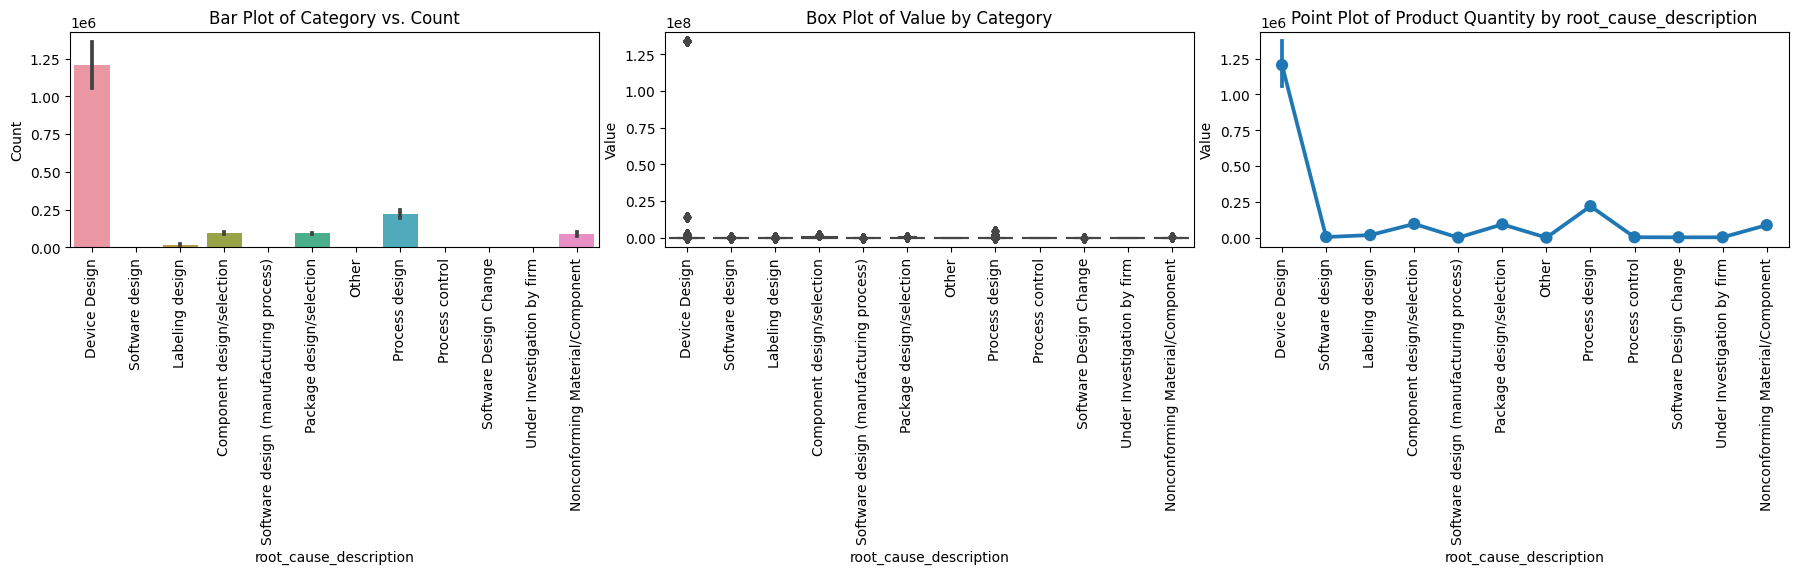

In [83]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Bar Plot
sns.barplot(x='root_cause_description', y='product_quantity_cleaned', data=df_openFDA, ax=axes[0])
axes[0].set_xlabel('root_cause_description')
axes[0].set_ylabel('Count')
axes[0].set_title('Bar Plot of Category vs. Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Box Plot
sns.boxplot(x='root_cause_description', y='product_quantity_cleaned', data=df_openFDA, ax=axes[1])
axes[1].set_xlabel('root_cause_description')
axes[1].set_ylabel('Value')
axes[1].set_title('Box Plot of Value by Category')
axes[1].tick_params(axis='x', rotation=90)

# Plot 3: Point Plot
sns.pointplot(x='root_cause_description', y='product_quantity_cleaned', data=df_openFDA, ax=axes[2])
axes[2].set_xlabel('root_cause_description')
axes[2].set_ylabel('Value')
axes[2].set_title('Point Plot of Product Quantity by root_cause_description')
axes[2].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

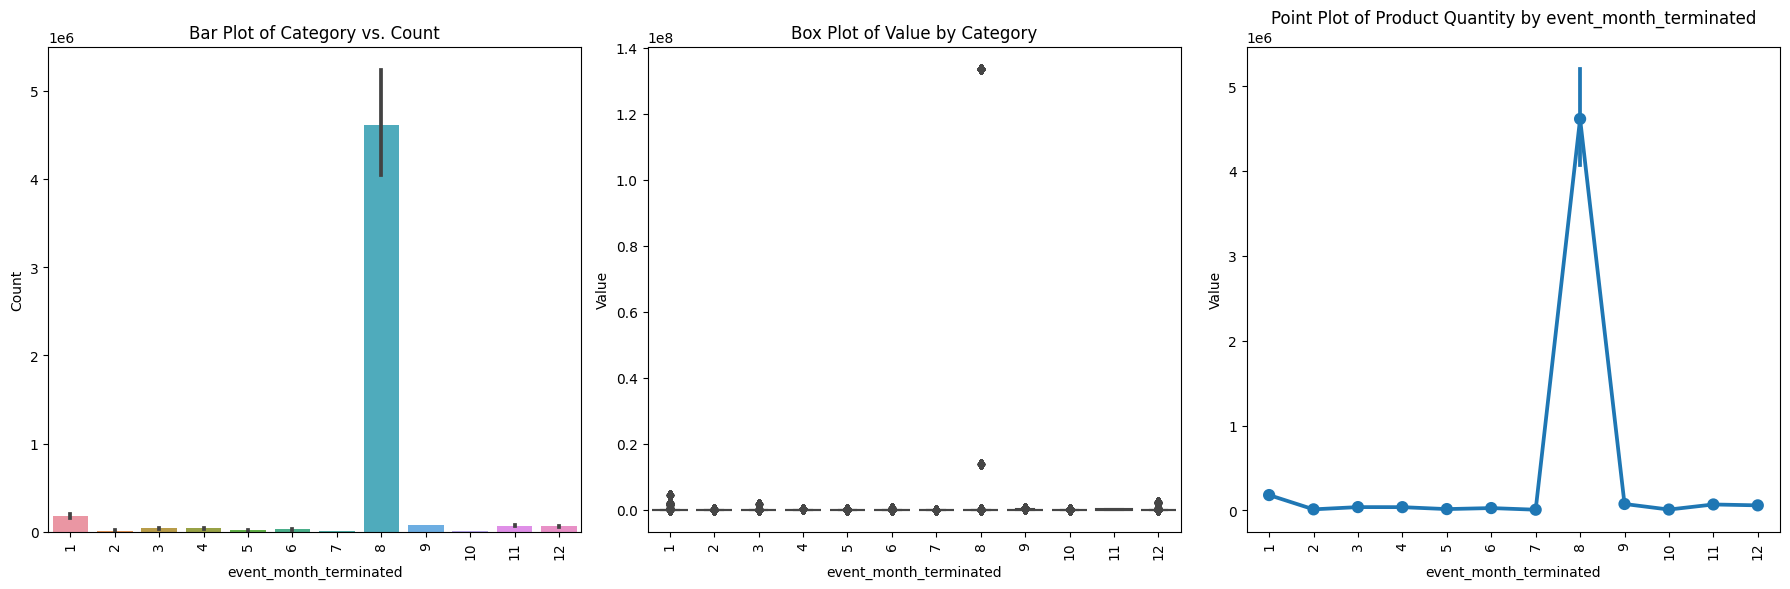

In [84]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Bar Plot
sns.barplot(x='event_month_terminated', y='product_quantity_cleaned', data=df_openFDA, ax=axes[0])
axes[0].set_xlabel('event_month_terminated')
axes[0].set_ylabel('Count')
axes[0].set_title('Bar Plot of Category vs. Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Box Plot
sns.boxplot(x='event_month_terminated', y='product_quantity_cleaned', data=df_openFDA, ax=axes[1])
axes[1].set_xlabel('event_month_terminated')
axes[1].set_ylabel('Value')
axes[1].set_title('Box Plot of Value by Category')
axes[1].tick_params(axis='x', rotation=90)

# Plot 3: Point Plot
sns.pointplot(x='event_month_terminated', y='product_quantity_cleaned', data=df_openFDA, ax=axes[2])
axes[2].set_xlabel('event_month_terminated')
axes[2].set_ylabel('Value')
axes[2].set_title('Point Plot of Product Quantity by event_month_terminated')
axes[2].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

# 1.3 Multivariate Analysis

In [85]:
df_openFDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 0 to 99998
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   state                        62400 non-null  object
 1   root_cause_description       62400 non-null  object
 2   openfda.device_class         62400 non-null  object
 3   time_duration                62400 non-null  int64 
 4   event_month_posted           62400 non-null  object
 5   event_year_posted            62400 non-null  object
 6   day_of_week_posted           62400 non-null  object
 7   event_month_terminated       62400 non-null  object
 8   event_year_terminated        62400 non-null  object
 9   day_of_week_terminated       62400 non-null  object
 10  product_quantity_cleaned     62400 non-null  int32 
 11  distribution                 62400 non-null  object
 12  cleaned_reason_for_recall    62400 non-null  object
 13  cleaned_product_description  62400 n

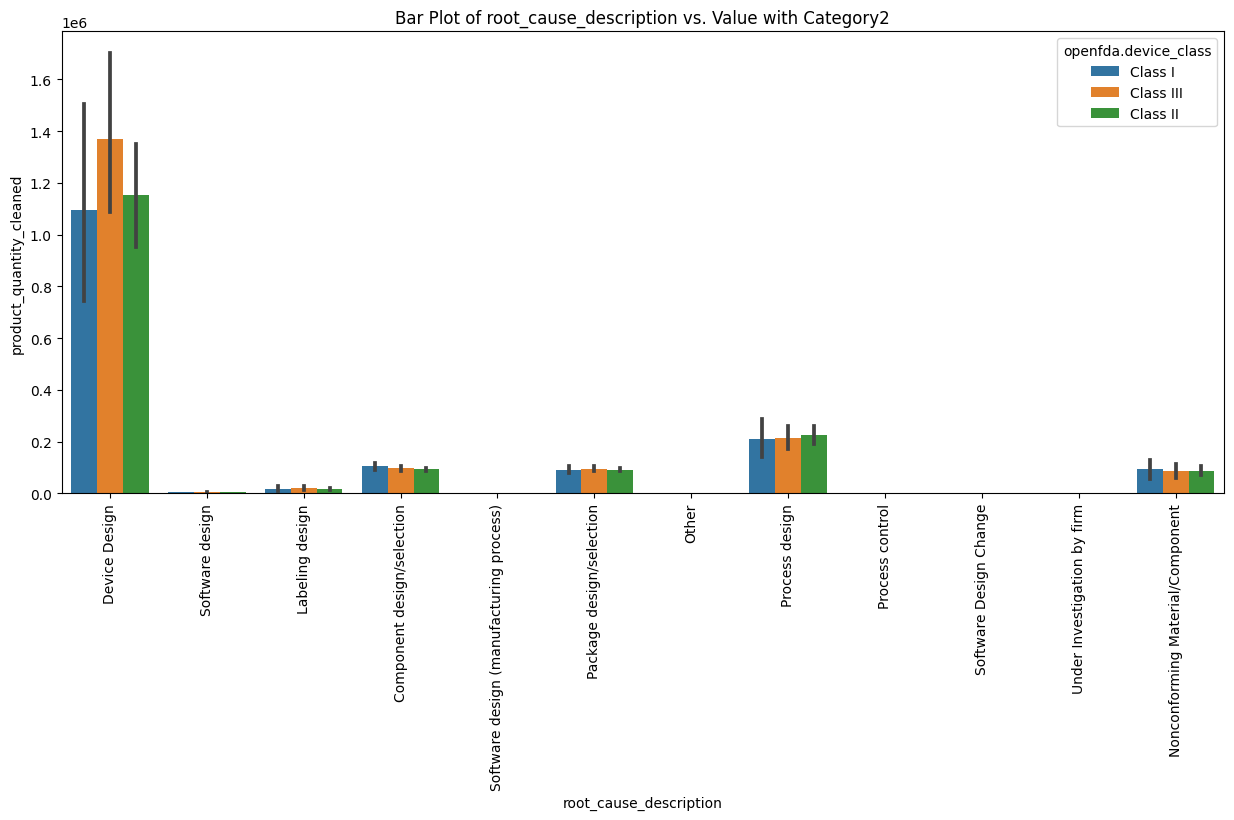

In [86]:
# plotting root_cause_description VS. openfda.device_class VS. product_quantity_cleaned

# Create a bar plot with two categorical variables and one integer variable
plt.figure(figsize=(15, 6))
sns.barplot(x='root_cause_description', y='product_quantity_cleaned', hue='openfda.device_class', data=df_openFDA)

# Set labels for axes and title
plt.xlabel('root_cause_description')
plt.ylabel('product_quantity_cleaned')
plt.title('Bar Plot of root_cause_description vs. Value with Category2')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the legend
plt.legend(title='openfda.device_class')

# Display the plot
plt.show()



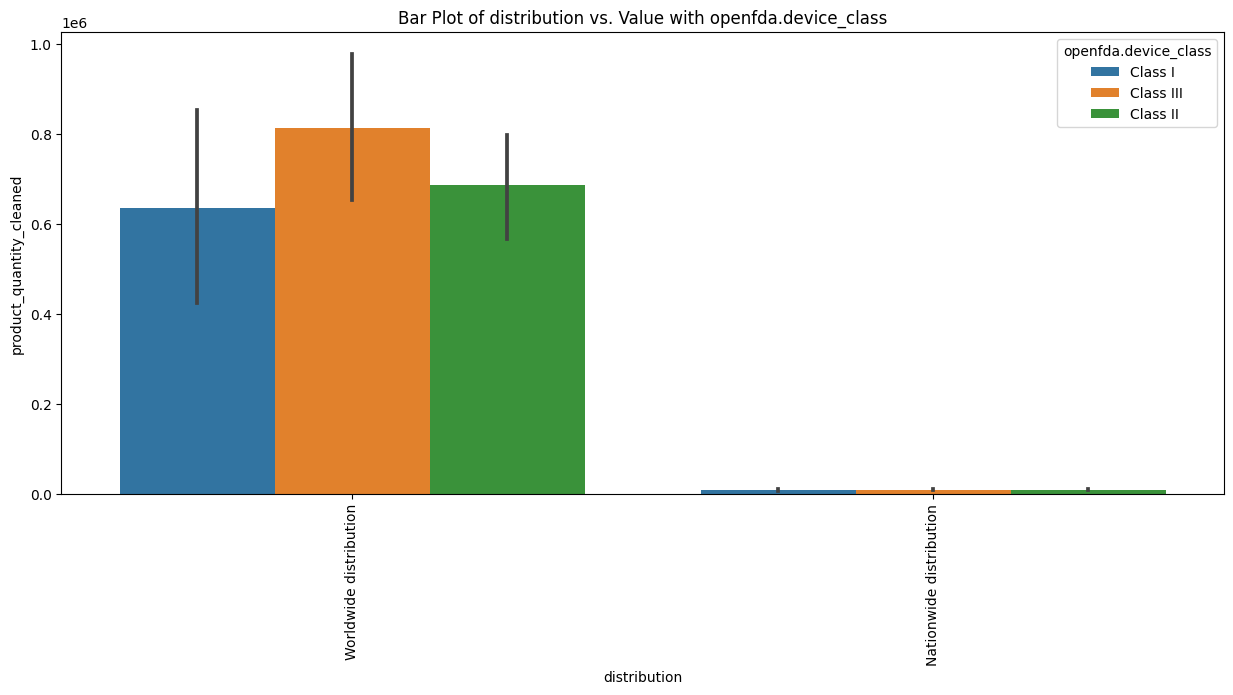

In [87]:
# plotting root_cause_description VS. openfda.device_class VS. product_quantity_cleaned

# Create a bar plot with two categorical variables and one integer variable
plt.figure(figsize=(15, 6))
sns.barplot(x='distribution', y='product_quantity_cleaned', hue='openfda.device_class', data=df_openFDA)

# Set labels for axes and title
plt.xlabel('distribution')
plt.ylabel('product_quantity_cleaned')
plt.title('Bar Plot of distribution vs. Value with openfda.device_class')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the legend
plt.legend(title='openfda.device_class')

# Display the plot
plt.show()

In [90]:
df_openFDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 0 to 99998
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   state                        62400 non-null  object
 1   root_cause_description       62400 non-null  object
 2   openfda.device_class         62400 non-null  object
 3   time_duration                62400 non-null  int64 
 4   event_month_posted           62400 non-null  object
 5   event_year_posted            62400 non-null  object
 6   day_of_week_posted           62400 non-null  object
 7   event_month_terminated       62400 non-null  object
 8   event_year_terminated        62400 non-null  object
 9   day_of_week_terminated       62400 non-null  object
 10  product_quantity_cleaned     62400 non-null  int32 
 11  distribution                 62400 non-null  object
 12  cleaned_reason_for_recall    62400 non-null  object
 13  cleaned_product_description  62400 n

In [94]:
corr_openfda = df_openFDA[['time_duration', 'product_quantity_cleaned']].corr()

<Axes: >

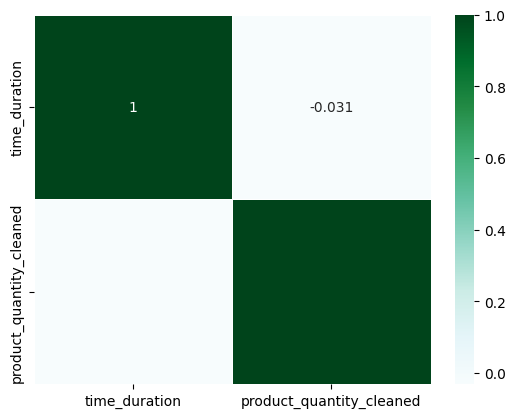

In [100]:
sns.heatmap(data=corr_openfda, annot=True, cmap='BuGn', linewidths=0.5)